## EDA

The aim of the project is to build a machine learning model to predict the insurance charges based on different explanatory features describing aspects of the insurer.

In [26]:
from pandas import read_csv
from os.path import exists
import os
from dotenv import load_dotenv

load_dotenv()

#Load the dataset

class LoadData:
    def __init__(self):
        file_name = None
        df = None
        
    def load_data(self, file_name=None):
        if file_name==None:
            raise Exception("File is not give. Please provide the file name!")
        else:
            self.df = read_csv(file_name)
        return self.df

ld = LoadData()
data_path = os.getenv('DATA_PATH')
file_name = 'train.csv'
file_path = data_path + file_name
if(exists(file_path)):
    df = ld.load_data(file_name=file_path)
else:
    raise Exception("File:%s not found!"%(file_name))

In [27]:
print("No. of Records: %d \n No. of Features: %d"%(df.shape[0], df.shape[1]))

df.head()

No. of Records: 1460 
 No. of Features: 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [28]:
df.drop('Id', axis=1, inplace=True)

In [29]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

insurance dataset is having 1460 records, and 80 features. from this 79 are independent features (Predictive features) and 1 is target feature (dependent feature): SalePrice

## Analysis

### Target Variable

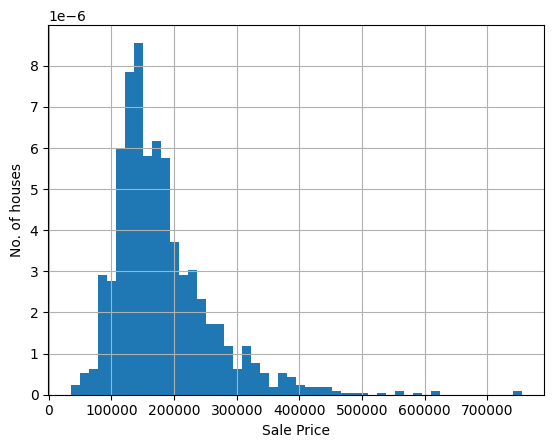

In [30]:
# Histogram to evaluate the target varibale
# Distribution of target variable

import matplotlib.pyplot as plt

df['SalePrice'].hist(bins=50, density=True)
plt.xlabel("Sale Price")
plt.ylabel("No. of houses")
plt.show()

We can see that the target variable is continuous and the distribution is skewed towards the right (Right Skew).

We can improve the values spread with a mathematical transformation (Log transformation).

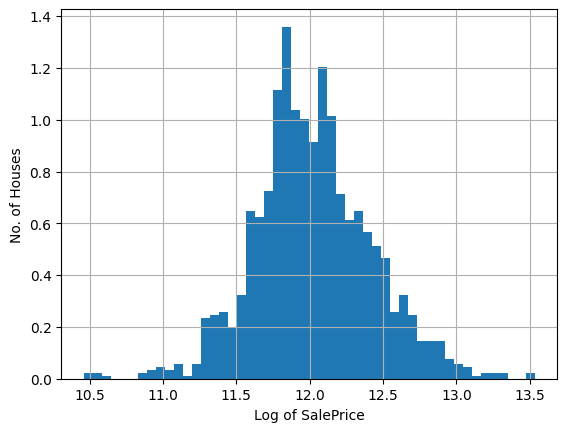

In [31]:
import numpy as np
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.xlabel("Log of SalePrice")
plt.ylabel("No. of Houses")
plt.show()

C:\Users\176706\AppData\Local\Temp\ipykernel_2972\3631706806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha':0.4})


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

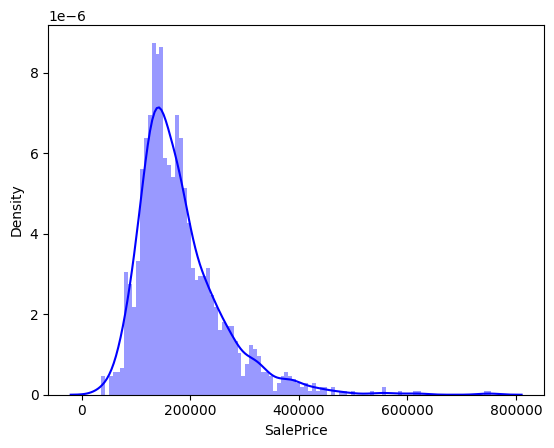

In [32]:
## Distribution of charges

import seaborn as sns

sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha':0.4})

C:\Users\176706\AppData\Local\Temp\ipykernel_2972\2040657644.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['SalePrice']), color='b', bins=100, hist_kws={'alpha':0.4})


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

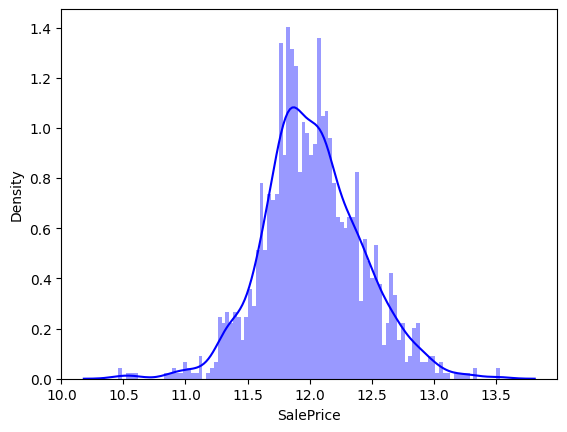

In [33]:
## Distribution of charges after log transformation

import seaborn as sns

sns.distplot(np.log(df['SalePrice']), color='b', bins=100, hist_kws={'alpha':0.4})

Now the charges feature distribution looks more Gaussian.

### Varibales type

In [34]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [35]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [43]:
# Categorical varibales
cat_var = [var for var in df.columns if df[var].dtype=='O']

# By defination MSSubClass is also a categorical, despite its numeric values
cat_var.append('MSSubClass')
print(cat_var)

print('\n\nNo. of categorical varibales: ', len(cat_var))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


No. of categorical varibales:  45


In [39]:
# Cast all varibales as categorical
df[cat_var] = df[cat_var].astype('O')

In [45]:
# Numerical varibales
num_var = [var for var in df.columns if var not in cat_var and var != 'SalePrice']
print(num_var)
print("\n\nNo. of numerical features: ", len(num_var))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


No. of numerical features:  35


## Missing values

In [46]:
# List of varibales with missing values

var_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[var_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Our dataset is having few varibales with high portion of missing values (PoolQC, MiscFeature, Alley, and Fence). Remaining varibales are having small percentage of missing values.

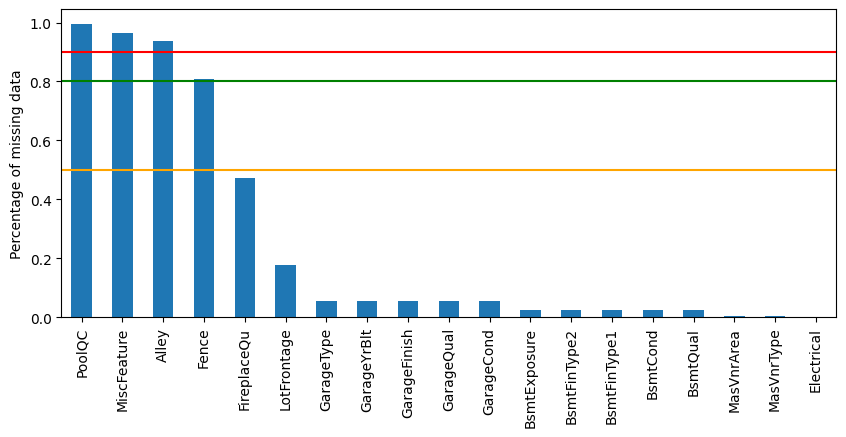

In [51]:
# Visualizing the missing percentage
df[var_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("Percentage of missing data")
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')
plt.axhline(y=0.50, color='orange', linestyle='-')
plt.show()

In [54]:
# Categorizing numerical features and categorical features from features that are having missing data
cat_na = [var for var in cat_var if var in var_with_na]
num_na = [var for var in num_var if var in var_with_na]

print("No. of categorical features with na: %d"%len(cat_na))
print("No. of numerical features with na: %d"%len(num_na))

No. of categorical features with na: 16
No. of numerical features with na: 3


In [55]:
# Numerical features with na
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [56]:
# Categorical features with na
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Relationship b/w missing data and SalePrice

Evaluate the price of the house in those observations where the information is missing.

In [58]:
def analysis_na_values(df, var):
    # Copy the df, so that we do not override the original data
    df = df.copy()
    
    # Making interim varibale that indicates 1 if the observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # Comparing median SalePrice in the observation where data is missing vs. the observation where data is available
    
    # We determined the median SalePrice in groups 1 and 0, and the standard deviation of the SalePrice
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # Plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
             xerr='std', title='Sale Price', color='green')
    plt.show()

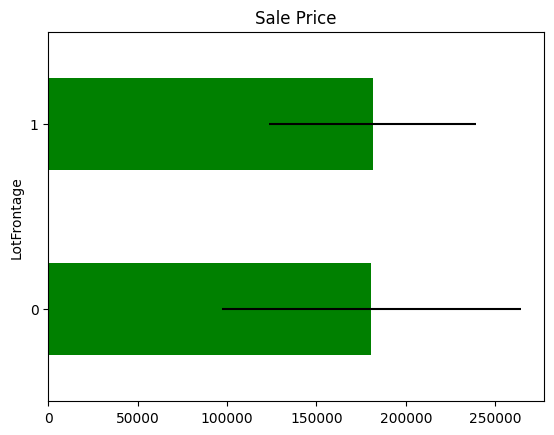

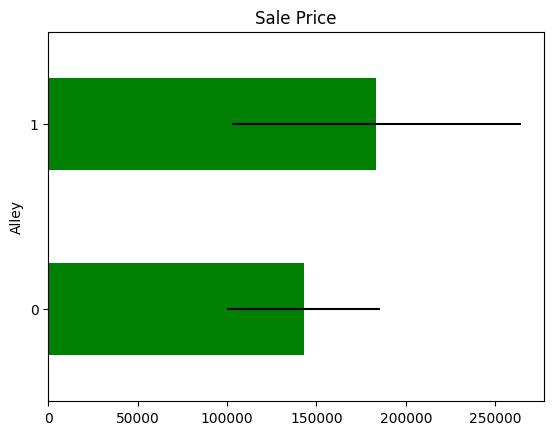

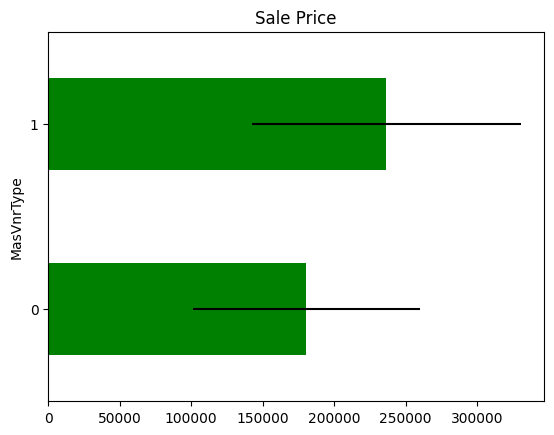

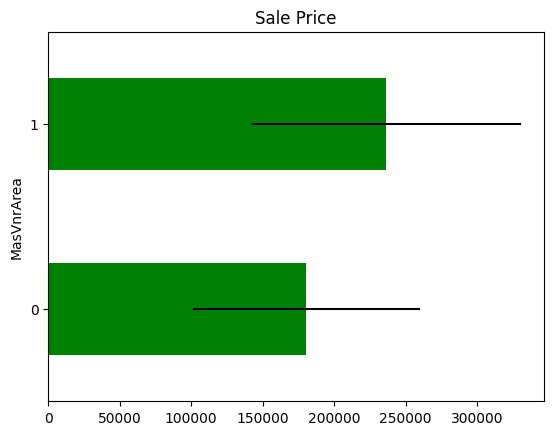

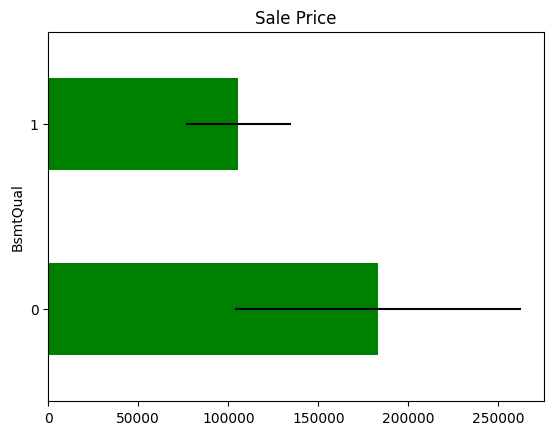

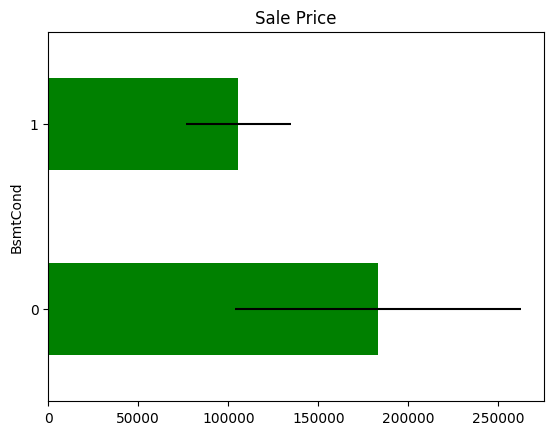

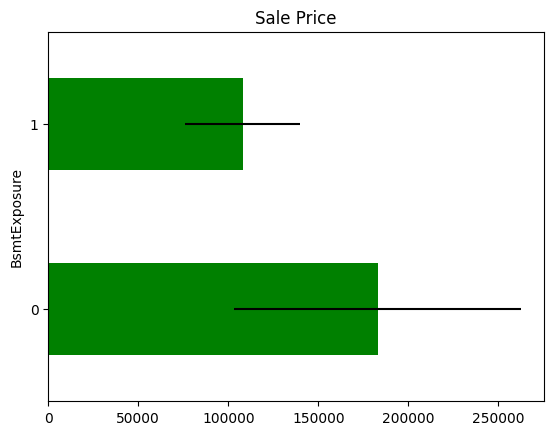

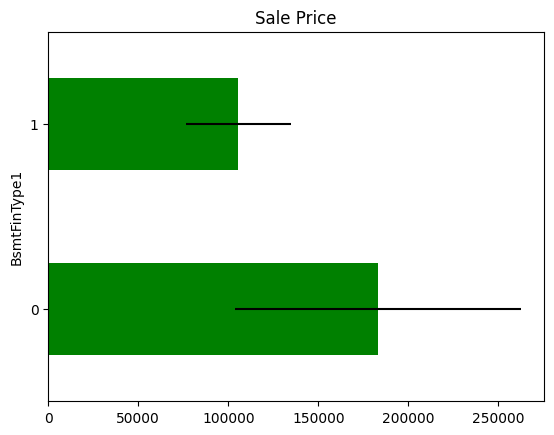

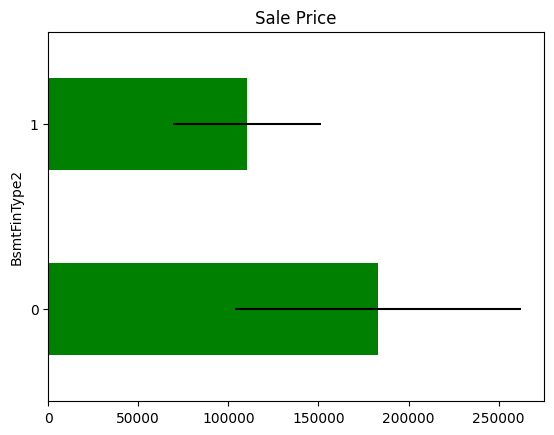

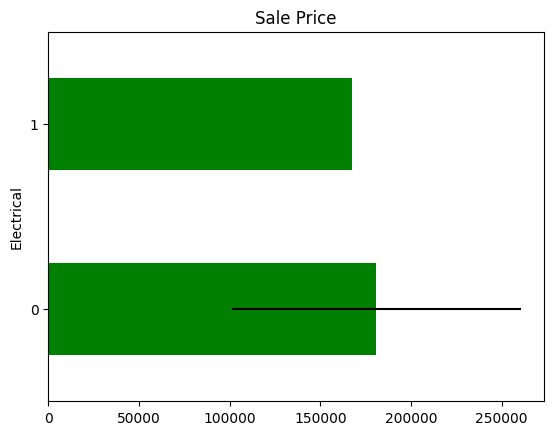

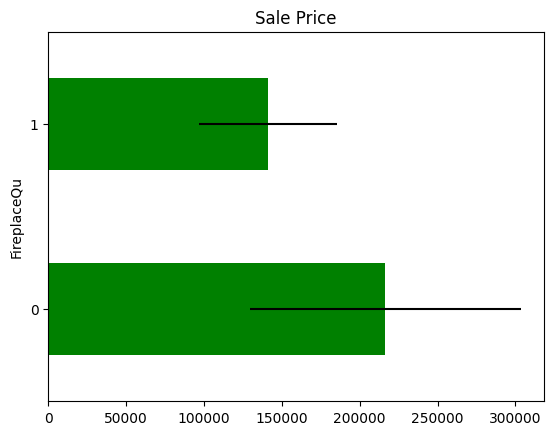

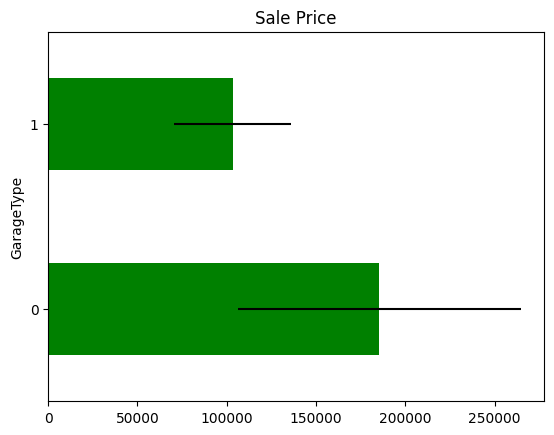

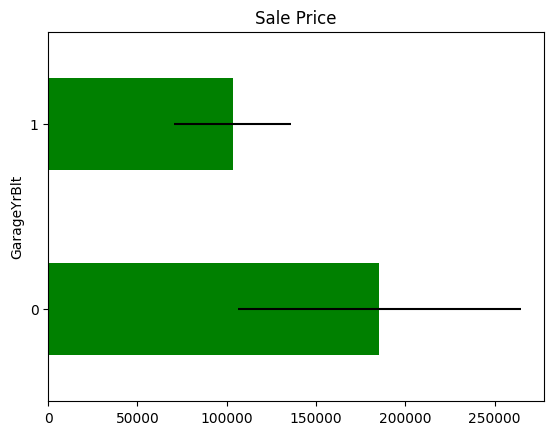

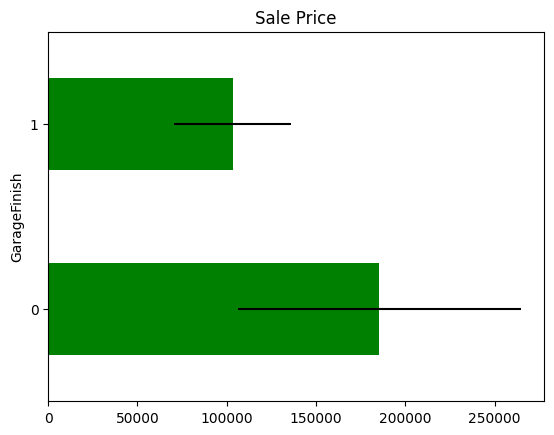

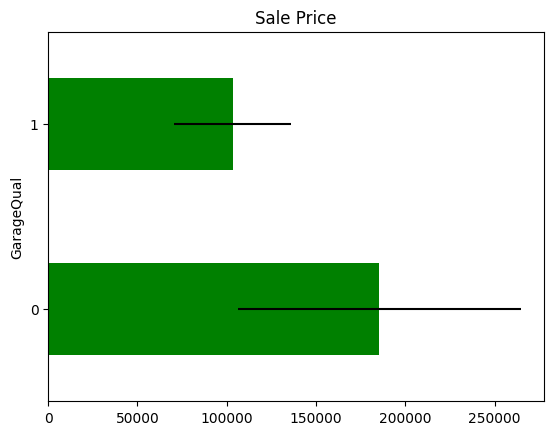

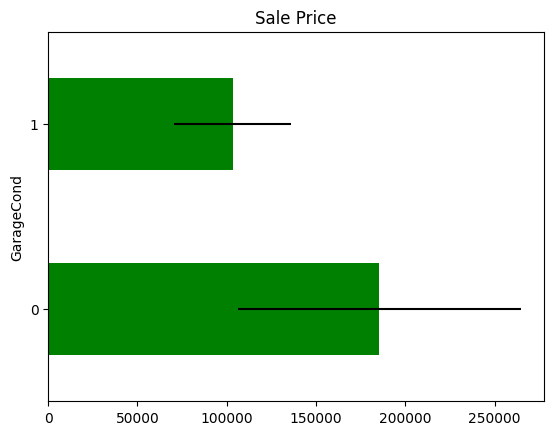

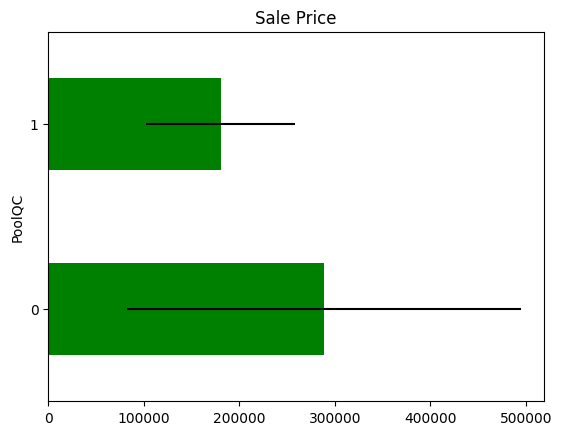

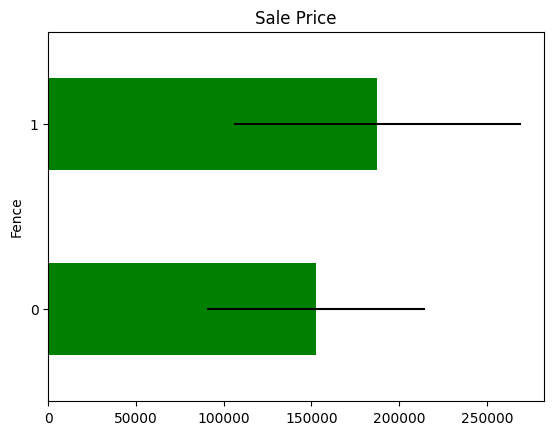

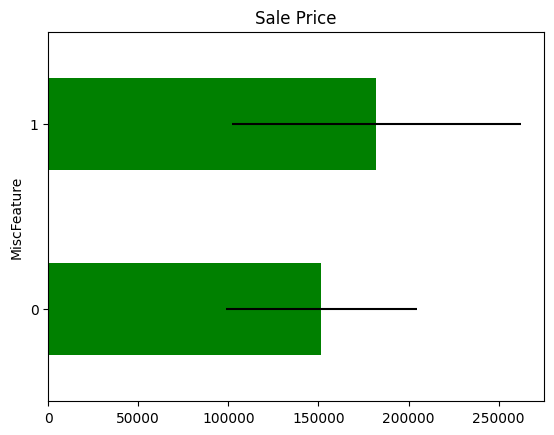

In [59]:
for col in var_with_na:
    analysis_na_values(df, col)

In some varibales, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists.
This suggests that data being missing could be a good predictor of Sale Price

### Numerical Varibales

In [60]:
# Numerical varibales in our datset
print('No. of numerical varibales %d'%len(num_var))

# data in numerical varibles
df[num_var].head()

No. of numerical varibales 35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       196.0         706           0        150  ...         548           0   
1         0.0         978           0        284  ...         460         298   
2       162.0         486           0        434  ...         608           0   
3         0.0         216           0        540  ...         642           0   
4       350.0         655           0        490  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 35 columns]

### Temporal Variables

we had four temporal (Year) varibales in our dataset

YearBuilt: year in which the house was built

YearRemodAdd: year in which the house was remodeled

GarageYrBlt: year in which a garage was built

YrSold: year in which the house was sold
    

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [61]:
# List of year variables
year_var = [var for var in df.columns if 'Yr' in var or 'Year' in var]
year_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [62]:
# Temporal variable values
for var in year_var:
    print(var, df[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0, 0.5, 'Median House Price')

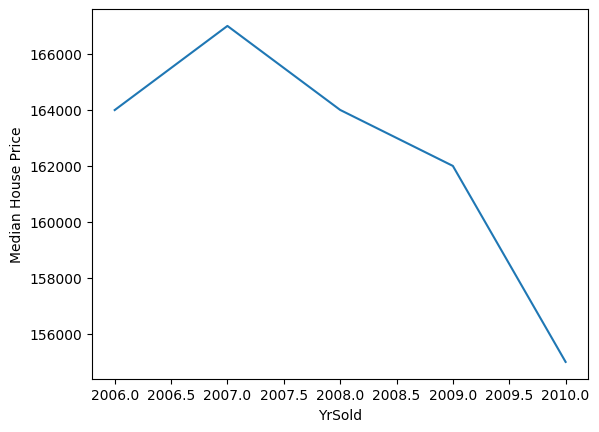

In [63]:
# Evaluation of SalePrice with respect to years in which the house was sold

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

there is a drop in the value of the houses.

Text(0, 0.5, 'Median House Price')

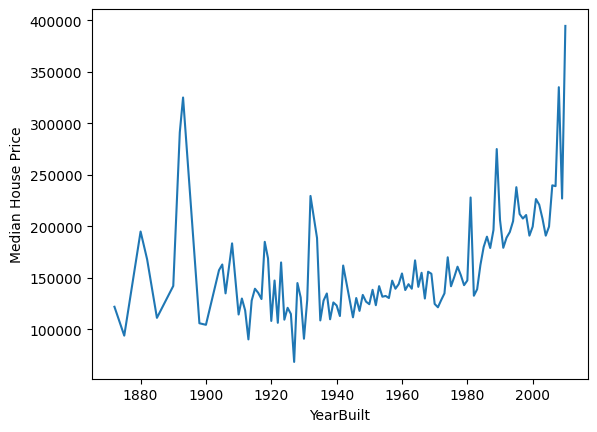

In [64]:
# SalePrice with respect to year in which the house was build
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel("Median House Price")

We can see that the newly built or younger houses tend to be more expensive

Could it be that lately older houses were sold?

for this  we will capture the elapsed years between the Year variables and the year in which the house was sold

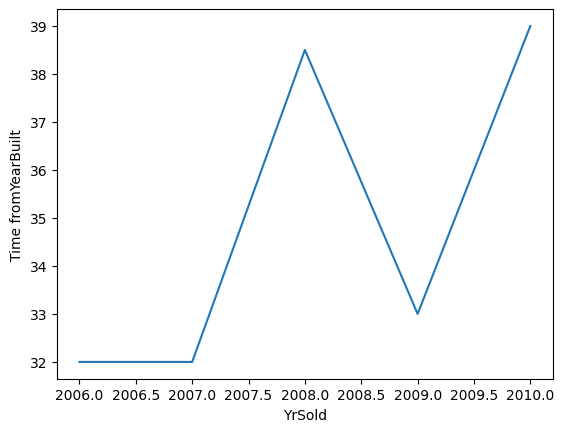

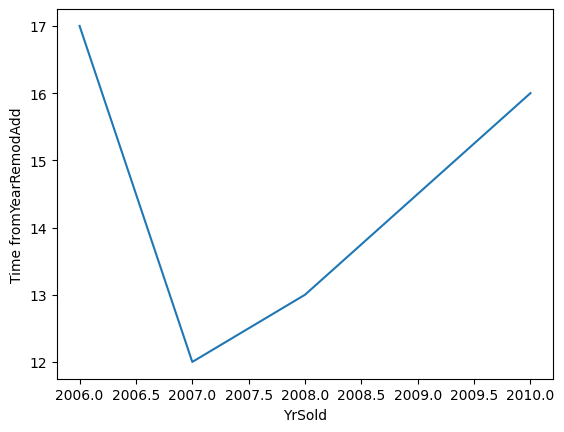

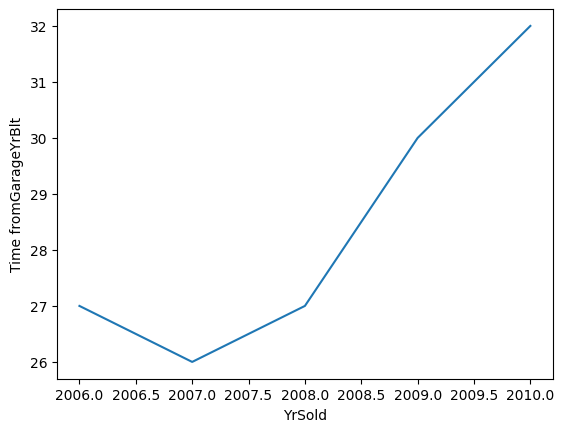

In [65]:
def analysis_year_vars(df, var):
    df = df.copy()
    
    #Difference between Year Variable and YearSold 
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel("Time from" + var)
    plt.show()

for var in year_var:
    if var!='YrSold':
        analysis_year_vars(df, var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

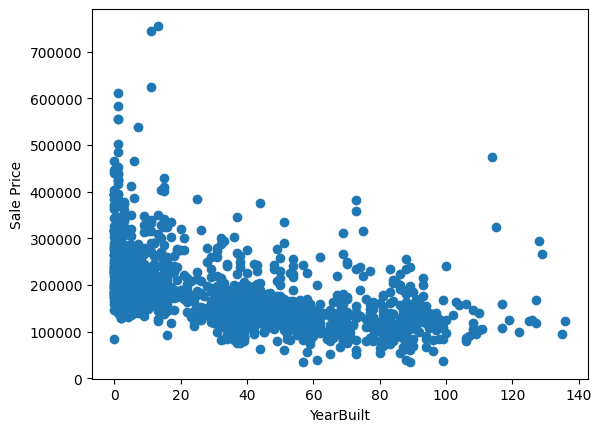

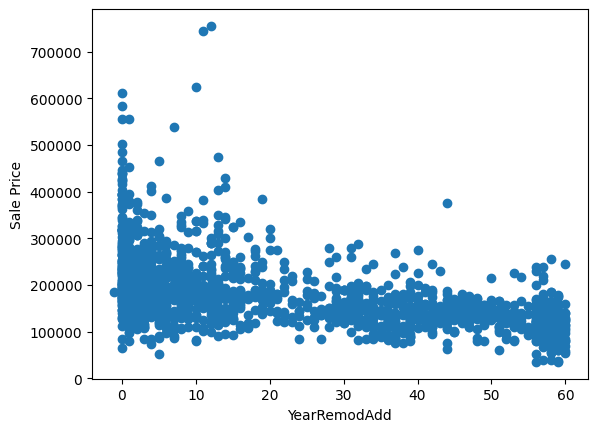

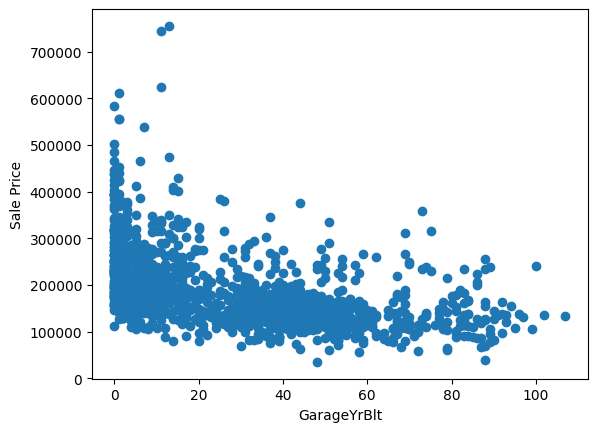

In [66]:
def analyse_year_vars(df, var):
    df = df.copy()
    
    #Difference between Year Variable and YearSold 
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel("Sale Price")
    plt.show()

for var in year_var:
    if var != 'YrSold':
        analyse_year_vars(df, var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

### Discrete variables

Finite number of values

In [68]:
# List of discrete varibales
descrite_vars = [var for var in num_var if len(df[var].unique()) < 20 and var not in year_var]

print('No of Discrite variables: %d'%len(descrite_vars))
df[descrite_vars].head()

No of Discrite variables: 13


OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).

We expect higher prices, with bigger numbers.

Let's go ahead and analyse their contribution to the house price.

MoSold is the month in which the house was sold.

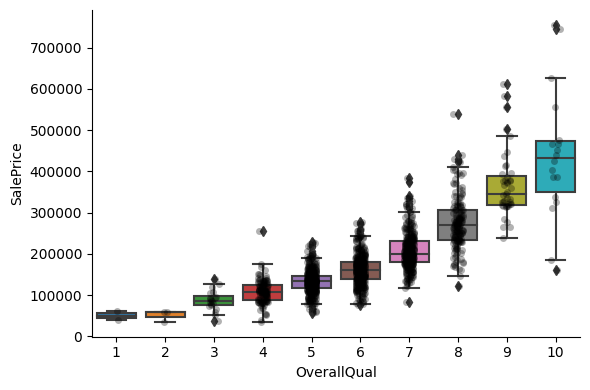

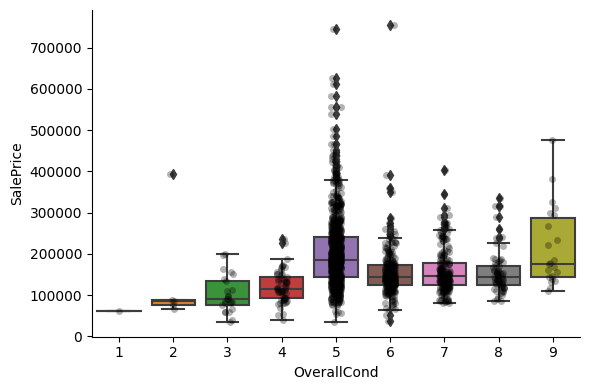

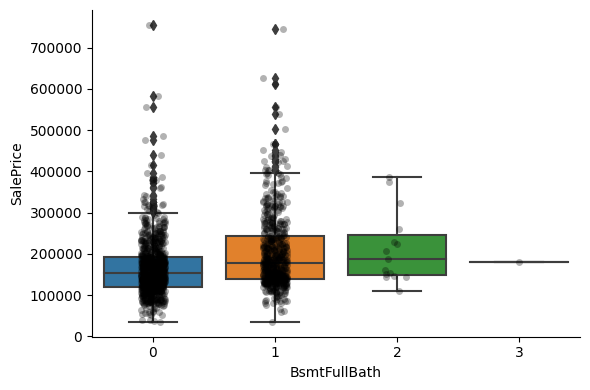

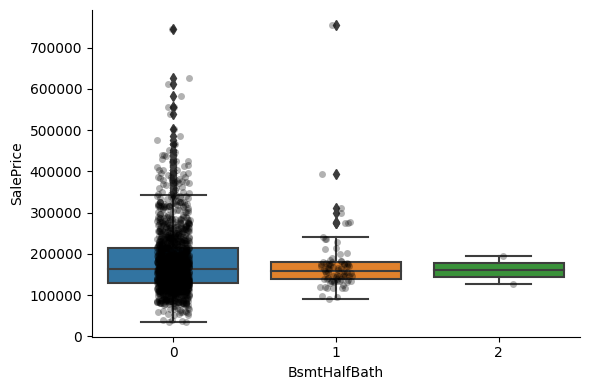

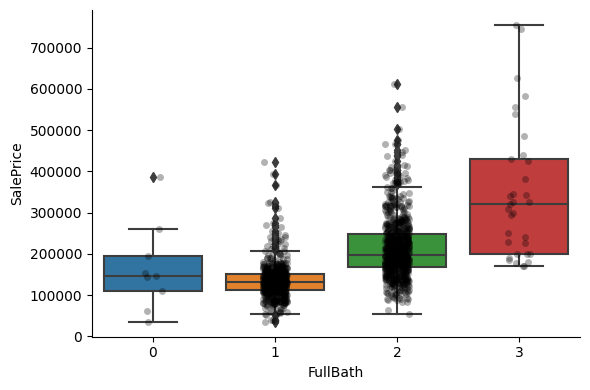

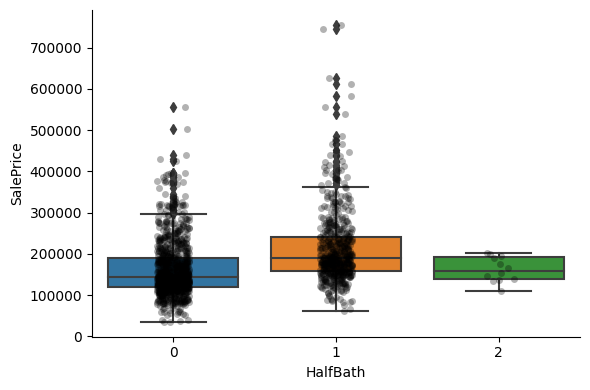

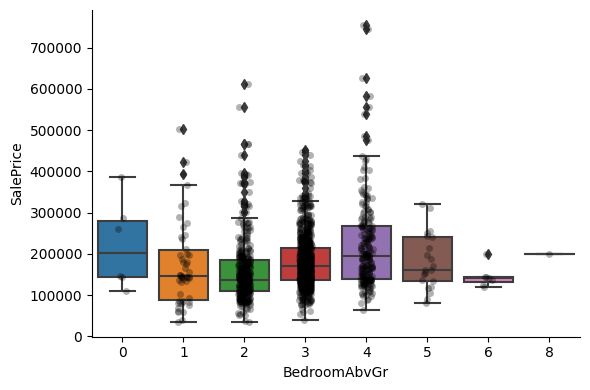

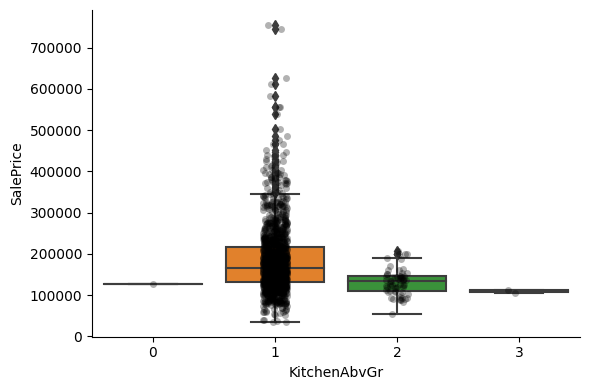

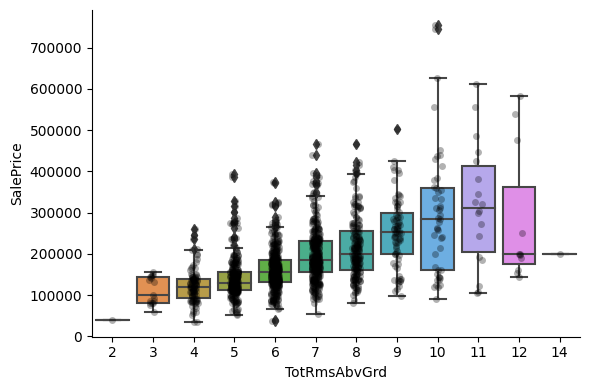

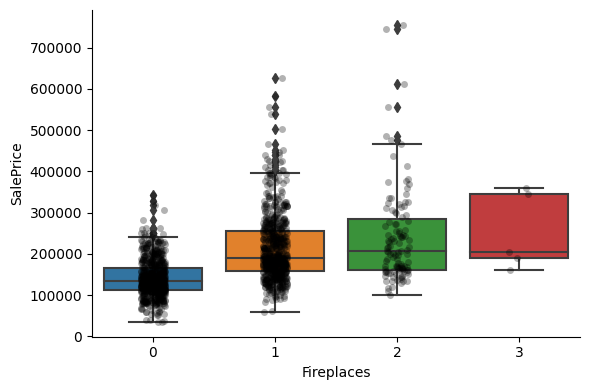

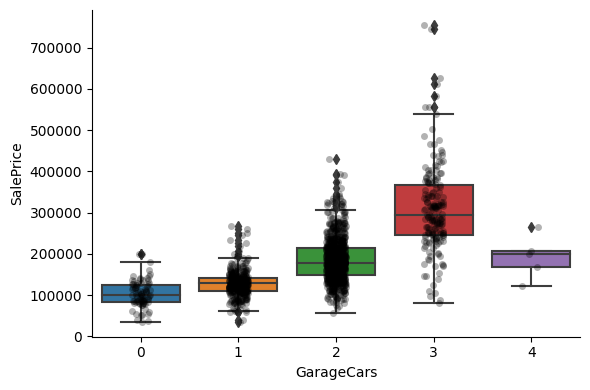

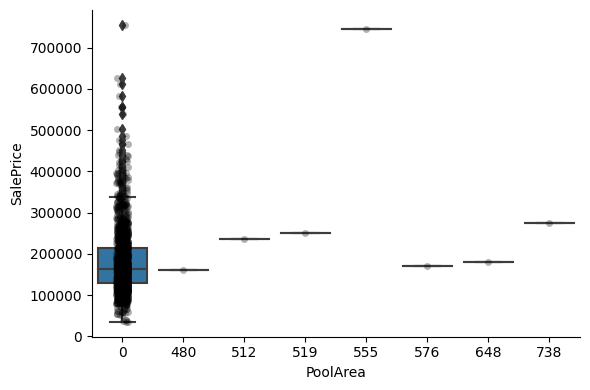

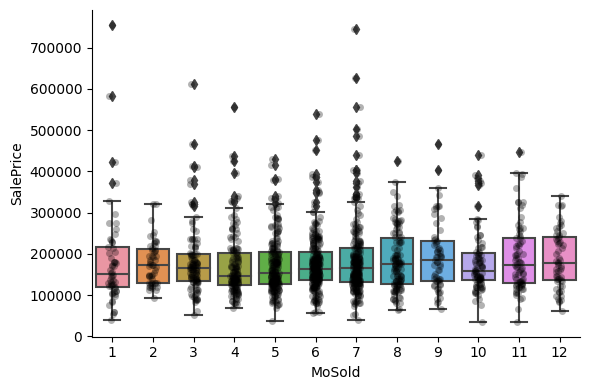

In [69]:
import seaborn as sns
for var in descrite_vars:
    # making box plot with catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind='box', height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or number of rooms, or surface.

For some variables, we don't see this tendency. Most likely that variable is not a good predictor of sale price.

### Continuous variables

In [72]:
# List of continuous varibales
cont_var = [var for var in num_var if var not in descrite_vars and var not in year_var]
print('No. of continuous varibales: %d' %len(cont_var))
df[cont_var].head()

No. of continuous varibales: 18


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

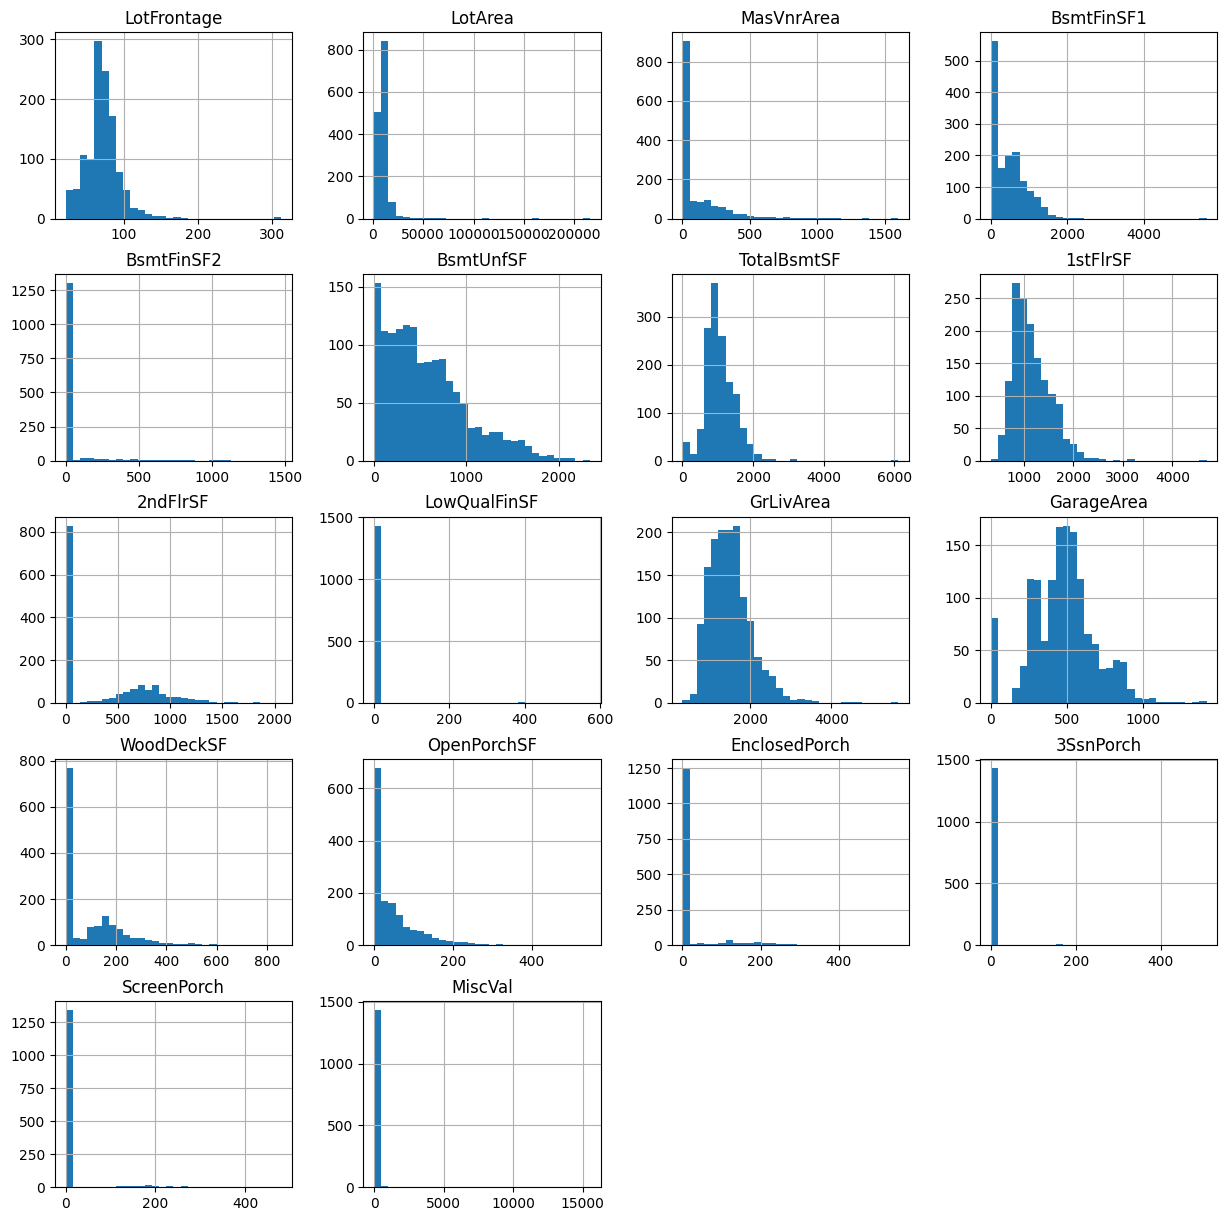

In [73]:
# Histogram for all continuous varibales
df[cont_var].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

In [74]:
# first make a list with the super skewed variables

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# capture the remaining continuous variables

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

### Yeo-Johnson transformation

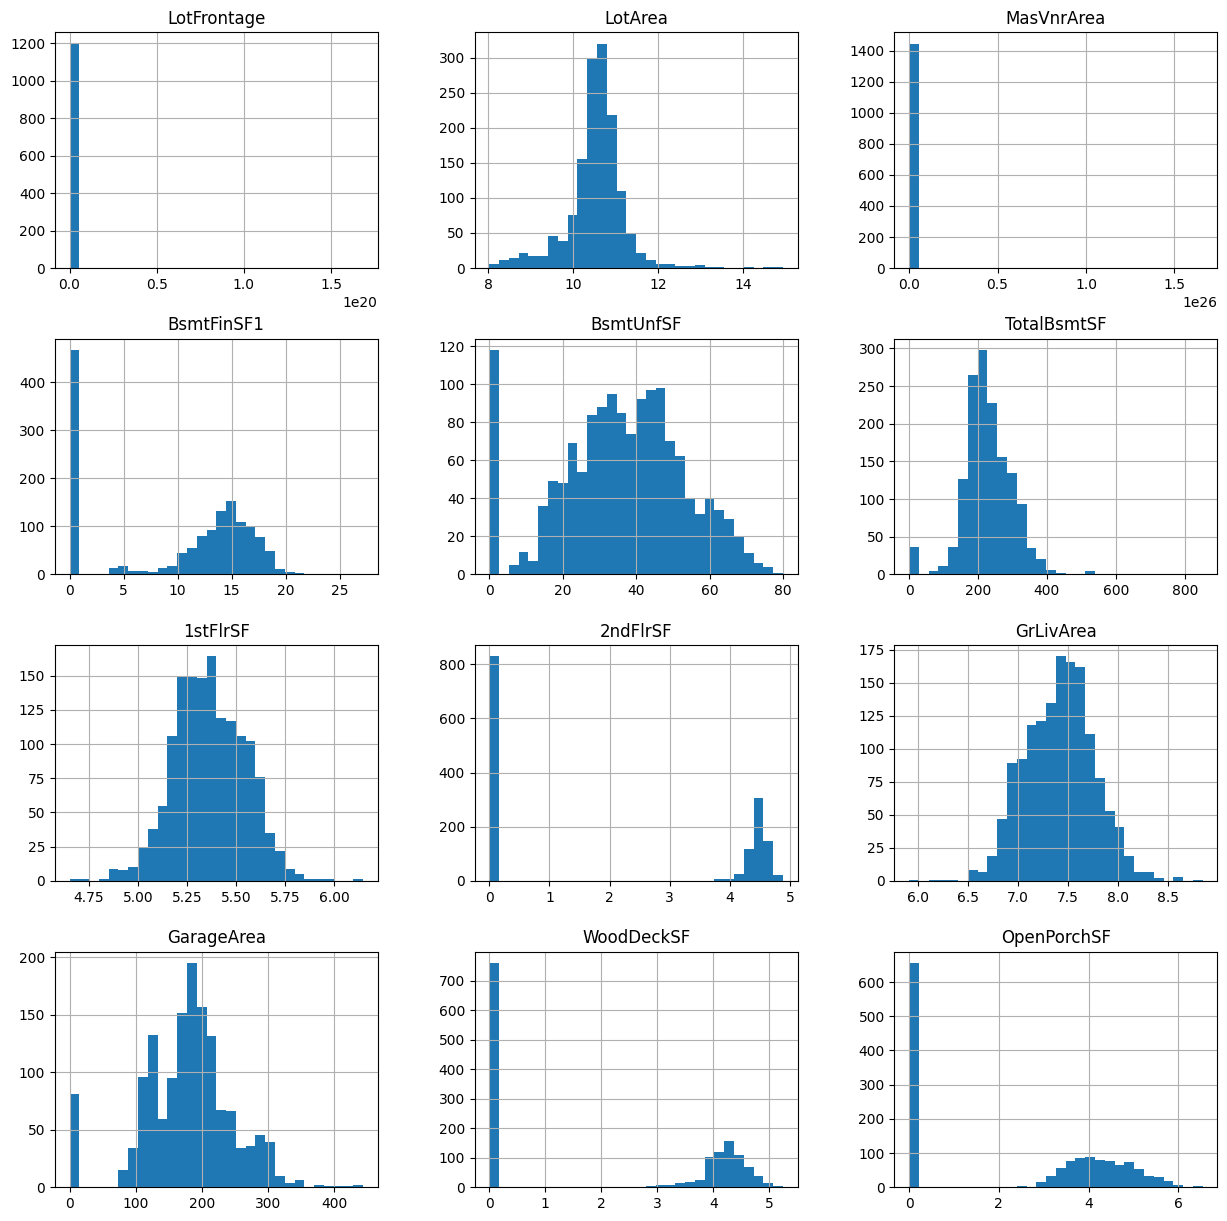

In [75]:
from scipy.stats import yeojohnson 
# distribution of varibale after Yeo-Johnson transformation
tmp = df.copy()

for var in cont_vars:
    # Transforming the variable
    tmp[var], param = yeojohnson(df[var])

# Ploting
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job.

For the others, the values seem to be spread more evenly in the range.

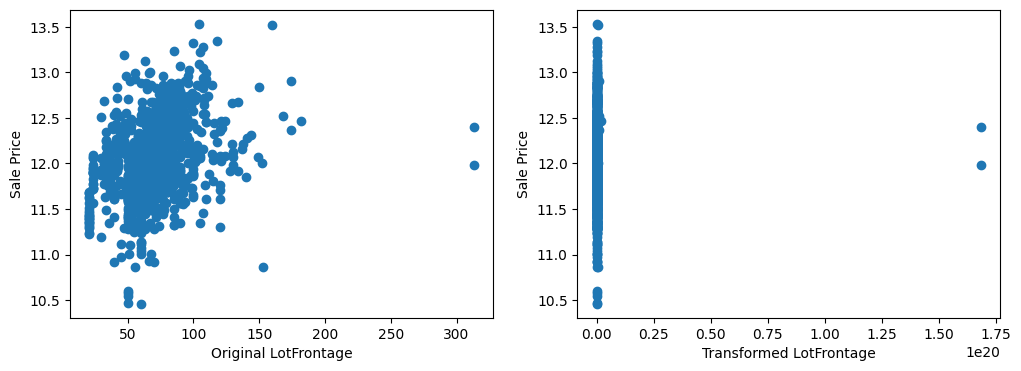

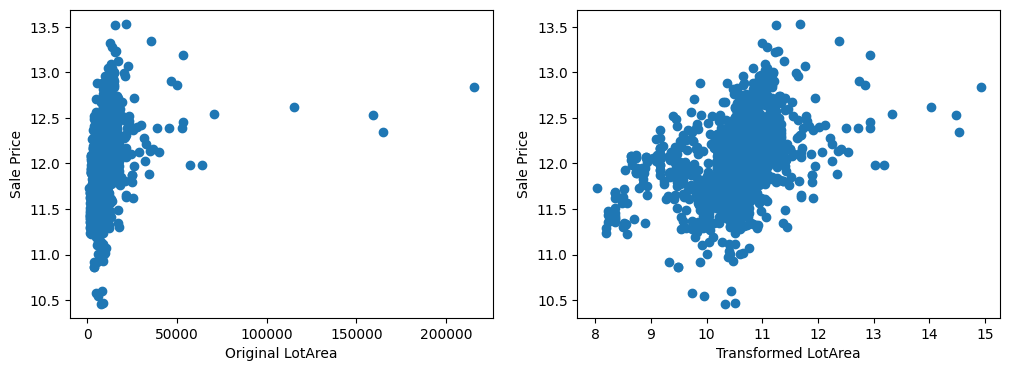

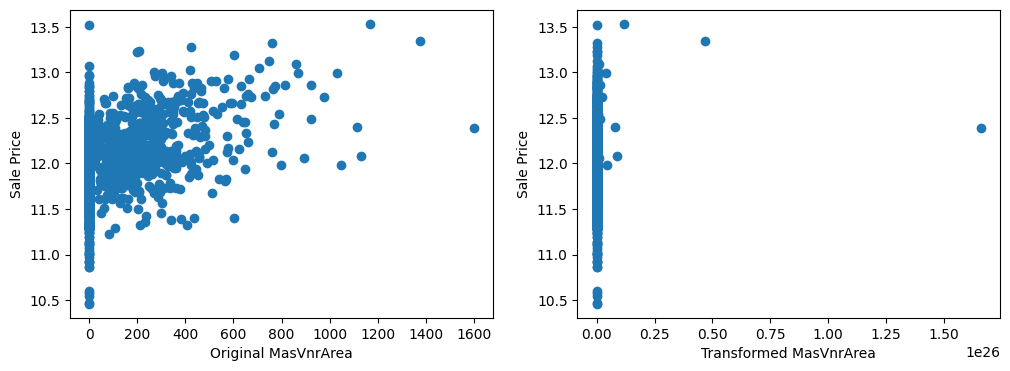

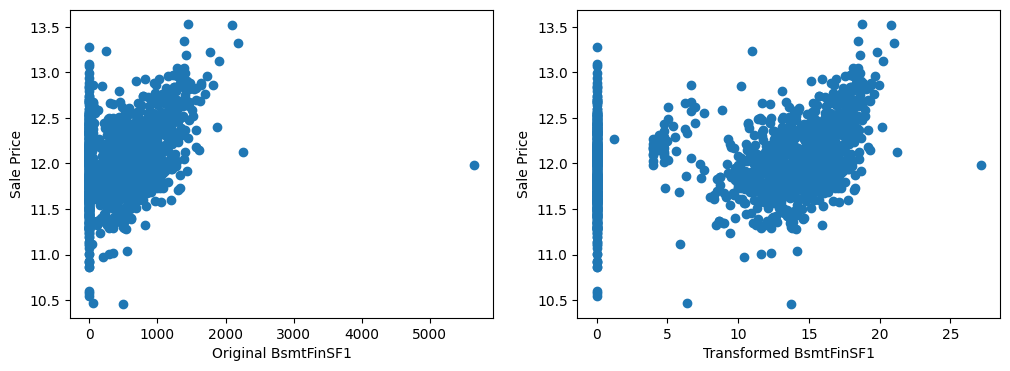

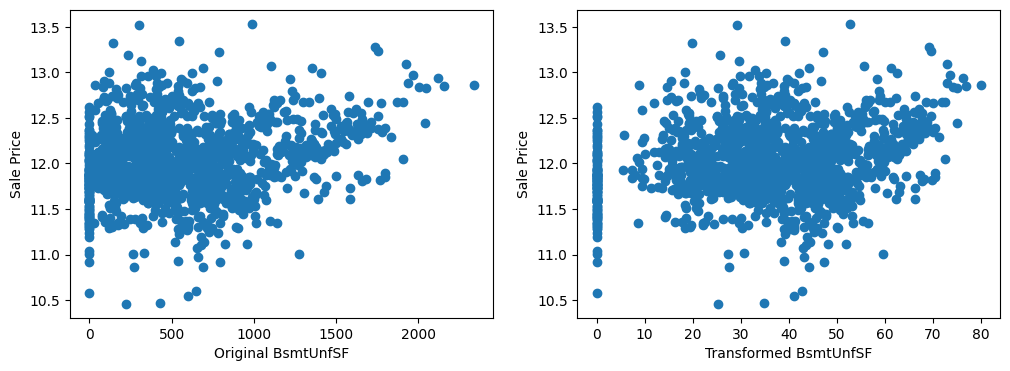

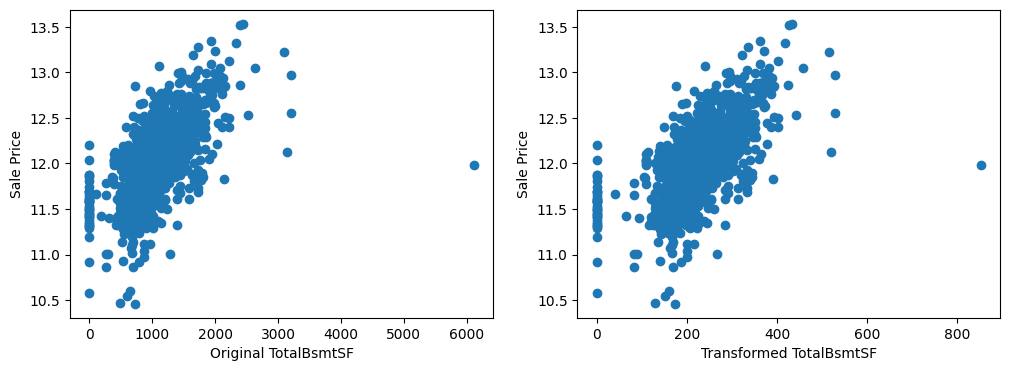

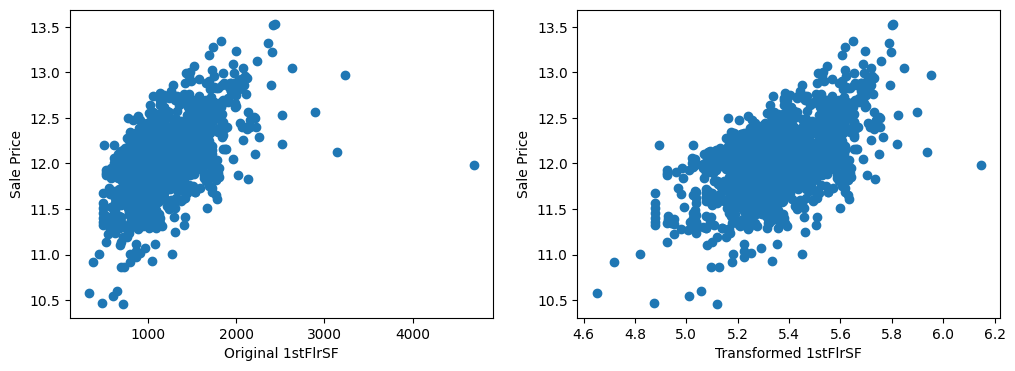

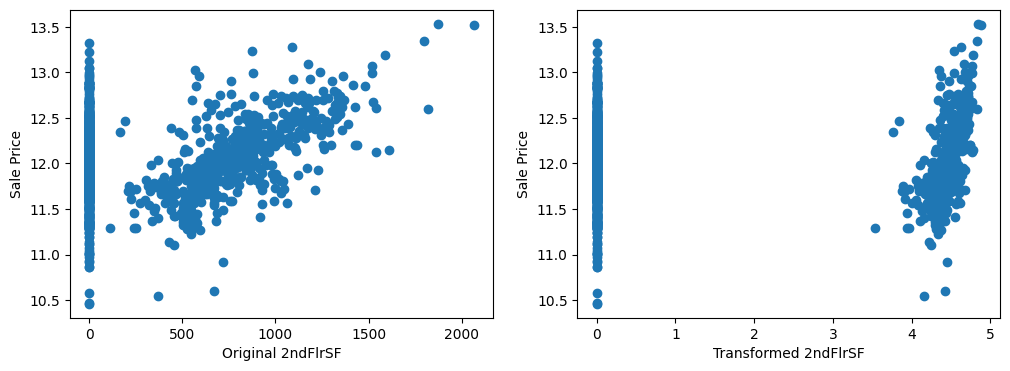

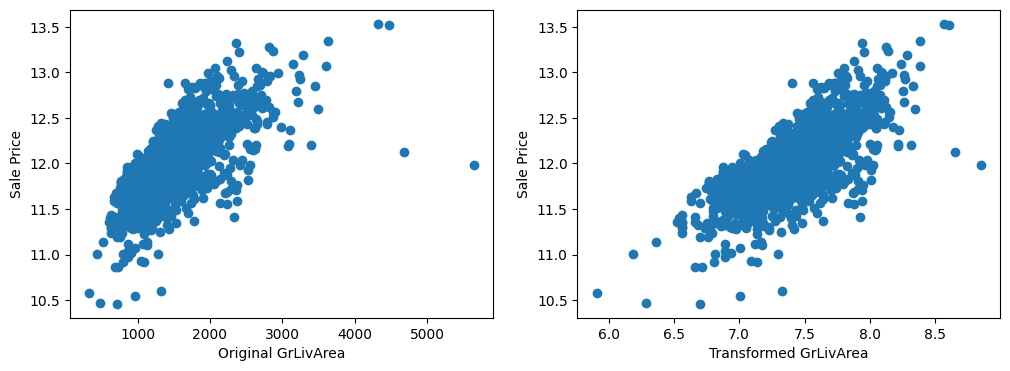

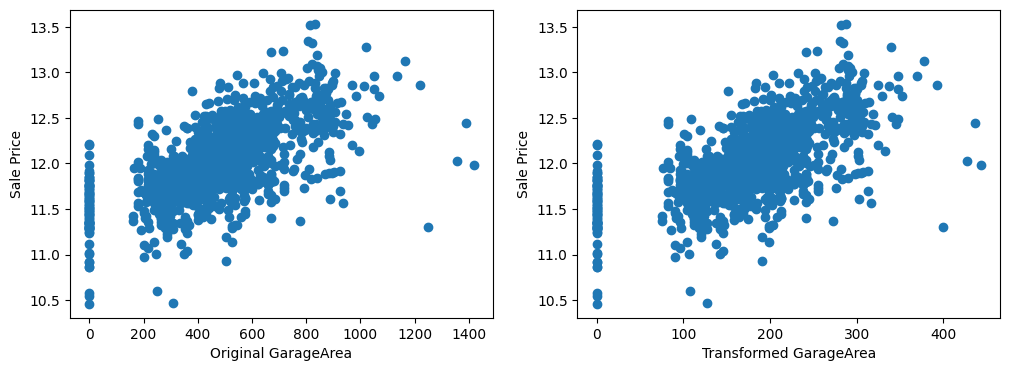

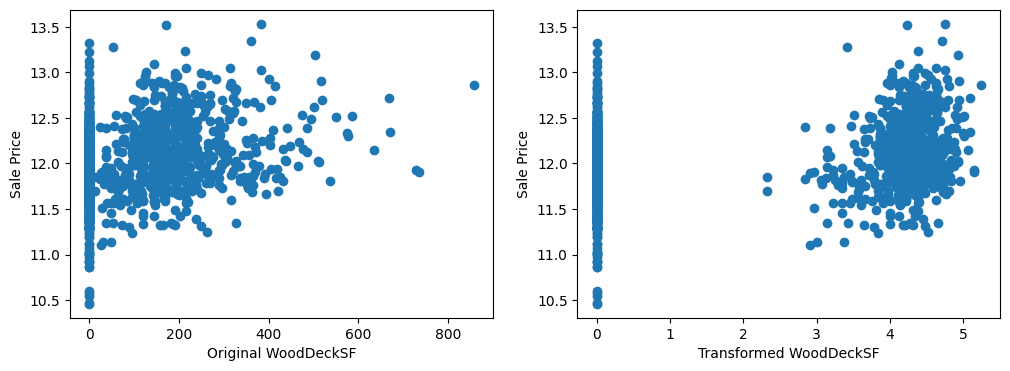

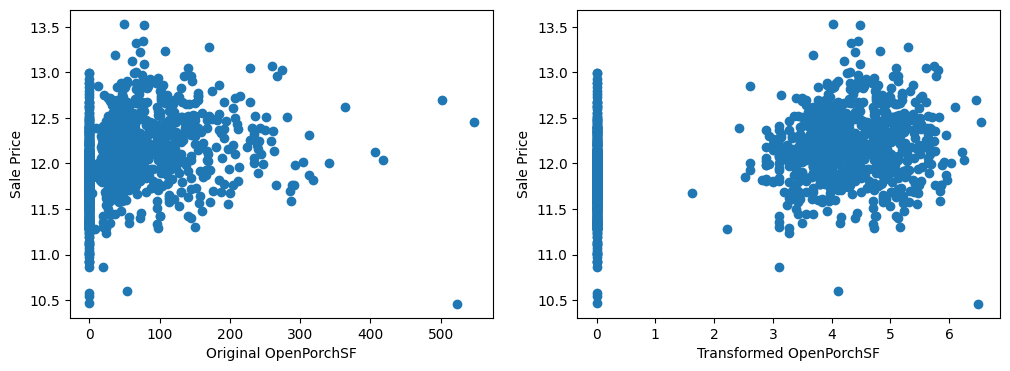

In [76]:
# plot the original or transformed varibales vs sale price, and see if there is a relationship
for var in cont_vars:
    plt.figure(figsize=(12, 4))
    
    # plot the original varibale vs. sale price
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.xlabel('Original '+var)
    plt.ylabel('Sale Price')
    
    # plot transformed varibale vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(df['SalePrice']))
    plt.xlabel('Transformed '+var)
    plt.ylabel('Sale Price')
    
    plt.show()
    

By eye, the transformations seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]

### Logarithmic Transformation

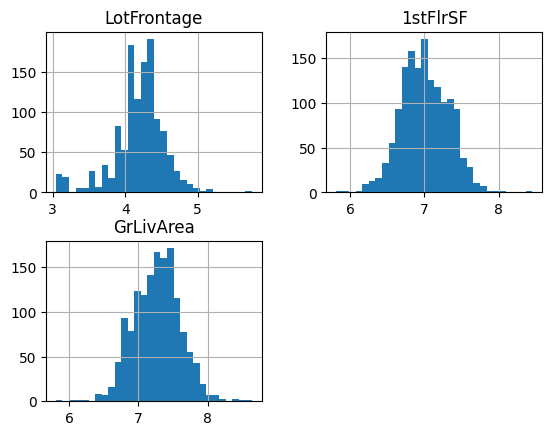

In [78]:
# Distribution of ["LotFrontage", "1stFlrSF", "GrLivArea"] after applying log transformation

tmp = df.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    # transform the variable with logarithm
    tmp[var] = np.log(df[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

The distribution of the variables are now more "Gaussian" looking.

Let's go ahead and evaluate their relationship with the target.

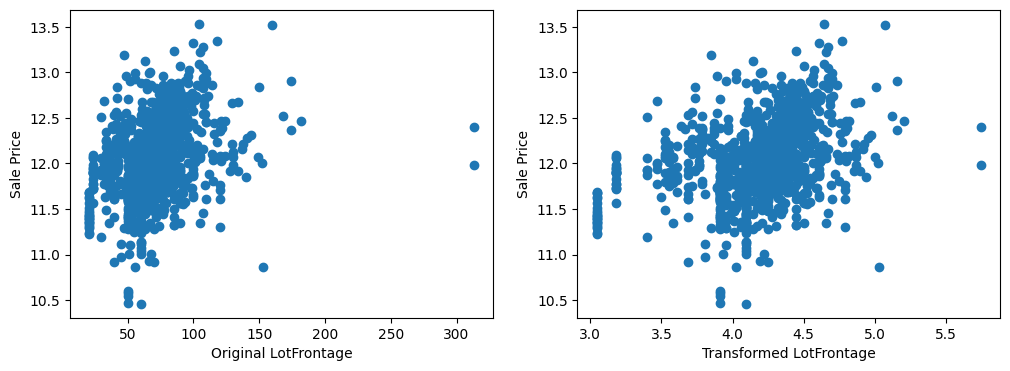

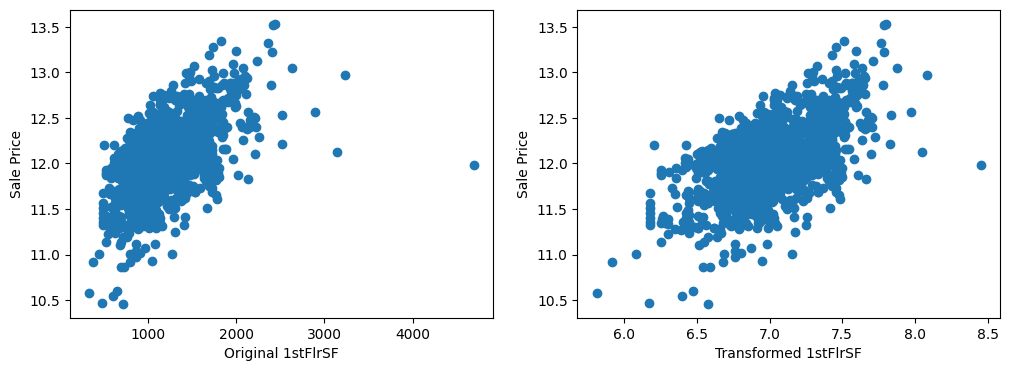

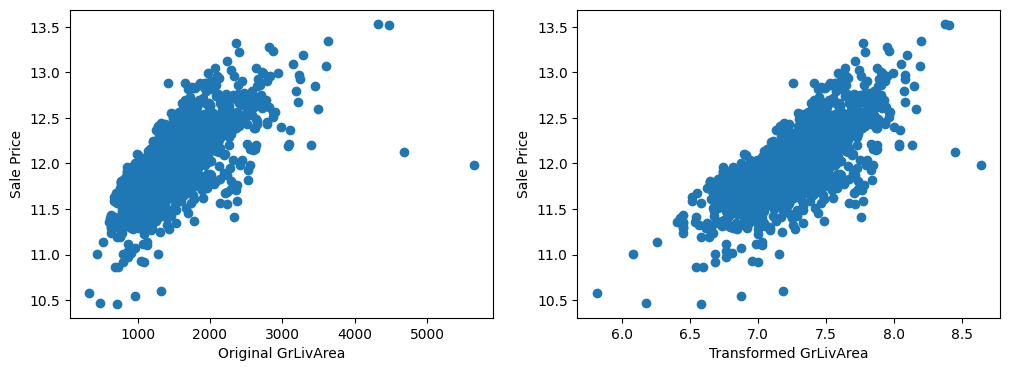

In [79]:
# plot the original or transformed varibales vs sale price, and see if there is a relationship
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    plt.figure(figsize=(12, 4))
    
    # plot the original varibale vs. sale price
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.xlabel('Original '+var)
    plt.ylabel('Sale Price')
    
    # plot transformed varibale vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(df['SalePrice']))
    plt.xlabel('Transformed '+var)
    plt.ylabel('Sale Price')
    
    plt.show()
    

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

### Skewed variables
Transform them into binary variables and see how predictive they are

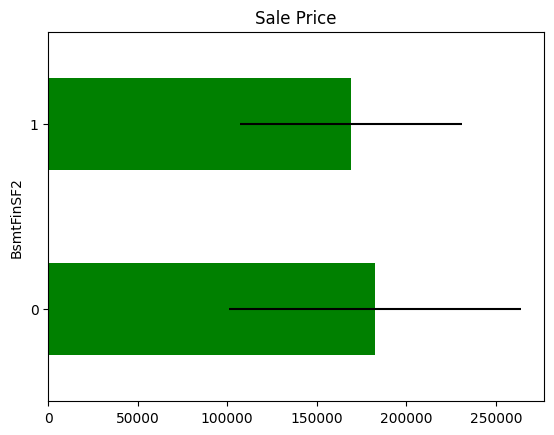

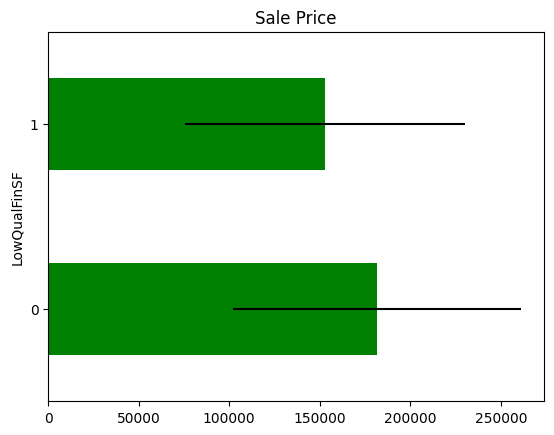

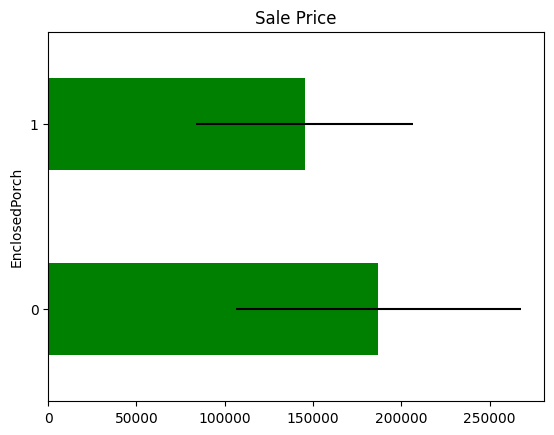

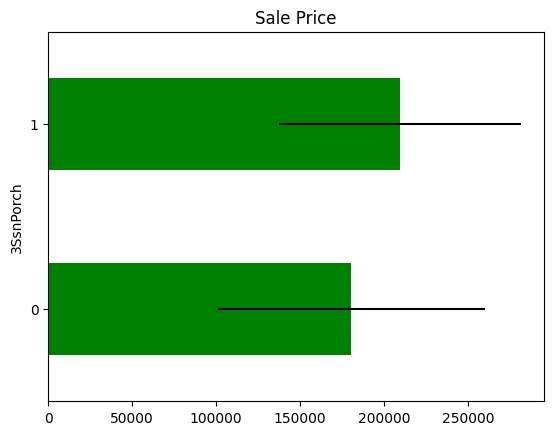

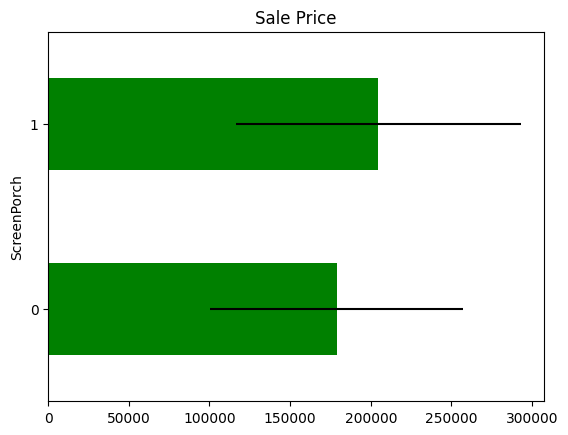

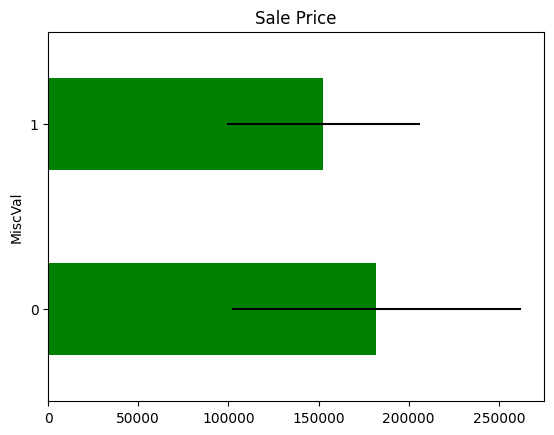

In [83]:
for var in skewed:
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # Plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False, 
             xerr='std', title='Sale Price', color='green'
            )
    plt.show()

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

### Categorical variables

In [86]:
print('No. of categorical features: %d'%len(cat_var))
df[cat_var].head()

No. of categorical features: 45


MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageFinish GarageQual GarageCond PavedDrive  \
0       Gtl      CollgCr  ...          RFn         TA         TA          Y   
1       Gtl      Veenker  ...          RFn         TA         TA          Y   
2       Gtl      CollgCr  ...          RFn         TA         TA          Y   
3       Gtl      Crawfor  ...          Unf         TA         TA          Y   
4       Gtl      NoRidge  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition MSSubClass  
0    NaN   NaN         NaN       WD        Normal         60  
1    NaN   NaN         NaN       WD        Normal         20  
2    NaN   NaN         NaN       WD        Normal         60  
3    NaN   NaN         NaN       WD       Abnorml         70  
4    NaN   NaN         NaN       WD        Normal         60  

[5 rows x 45 columns]

### Number of labels: cardinality

<AxesSubplot: >

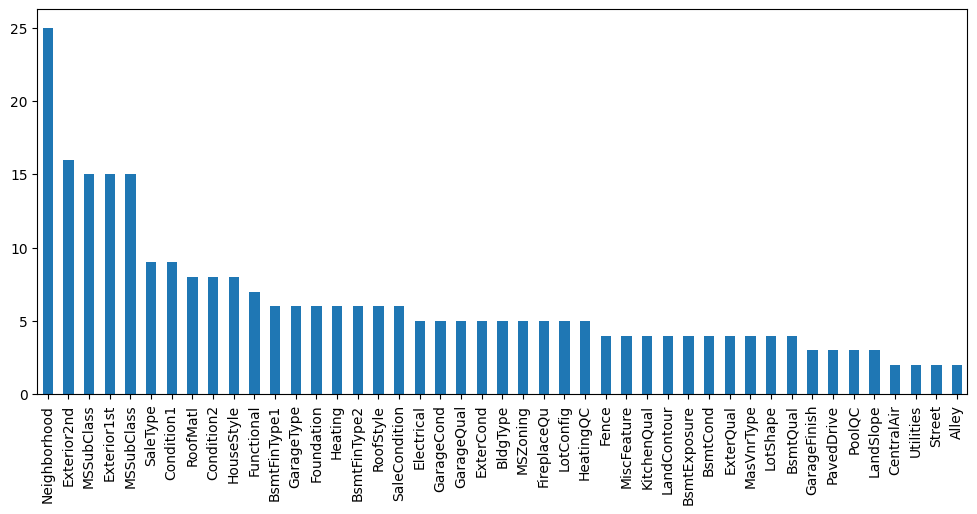

In [87]:
# ploting unique categories with descending order
df[cat_var].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering

### Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.


Ex = Excellent
Gd = Good
TA = Average/Typical
Fa = Fair
Po = Poor

In [88]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [89]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [90]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [91]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [92]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [93]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

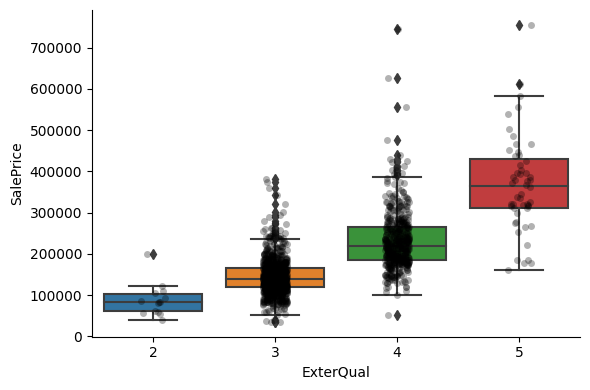

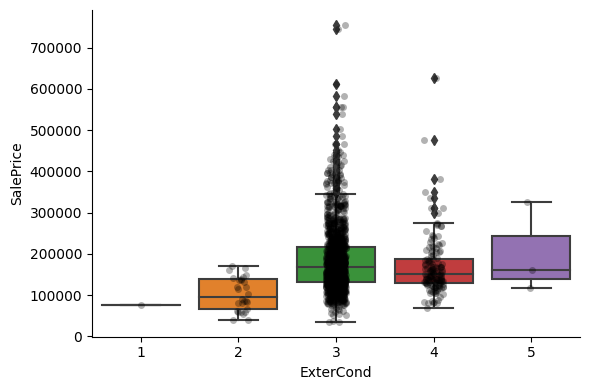

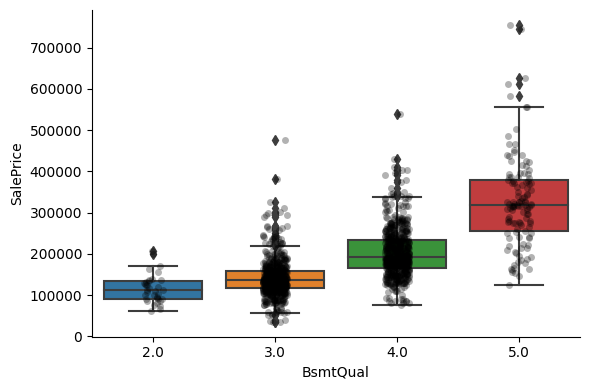

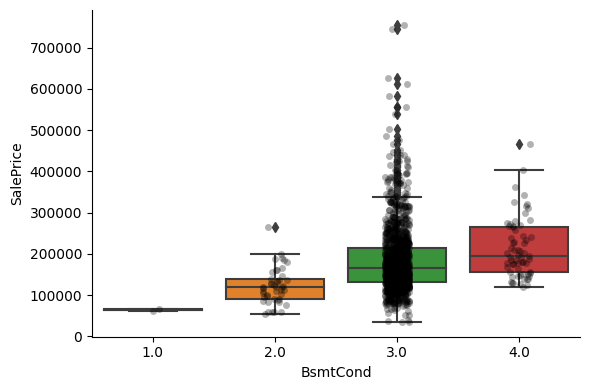

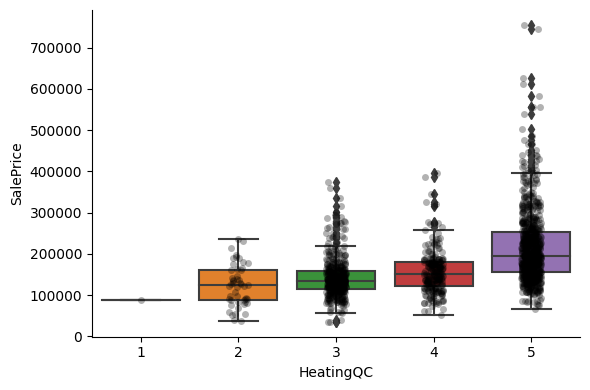

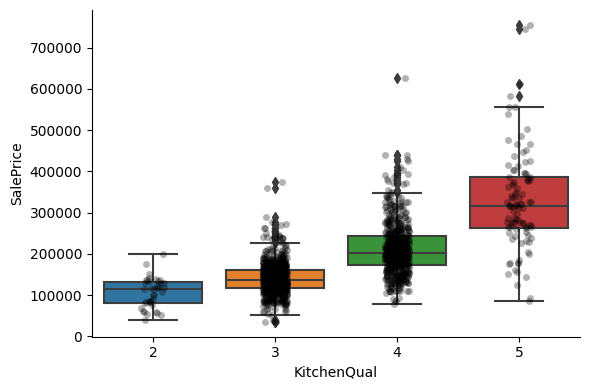

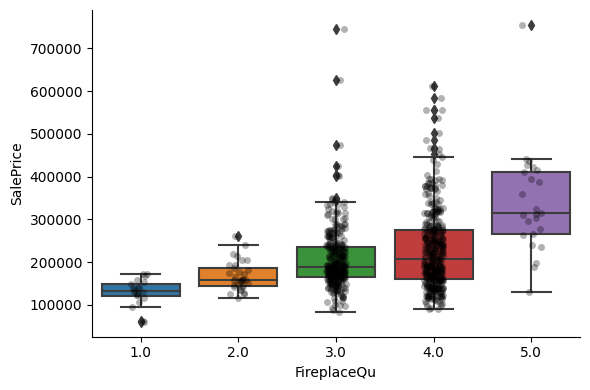

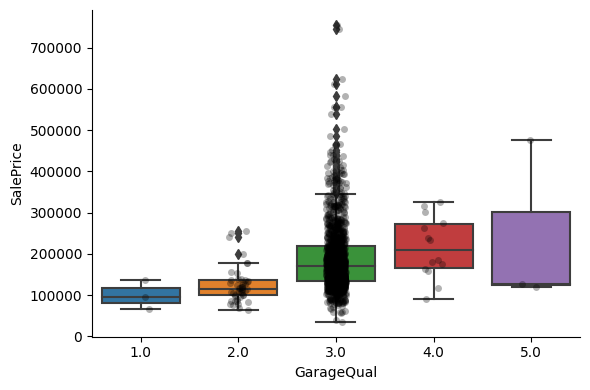

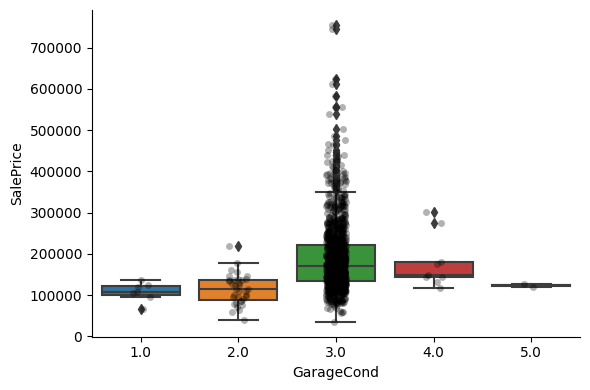

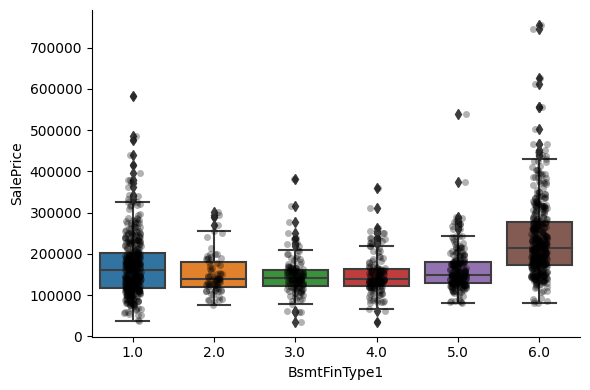

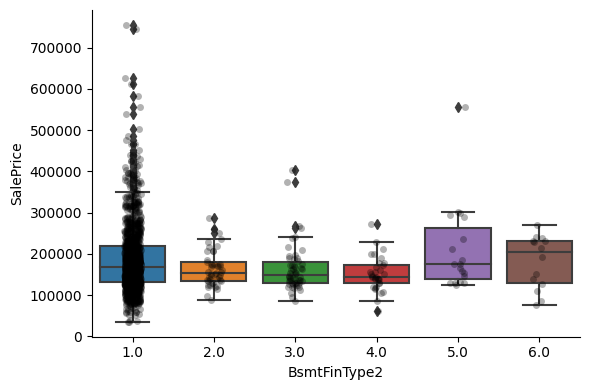

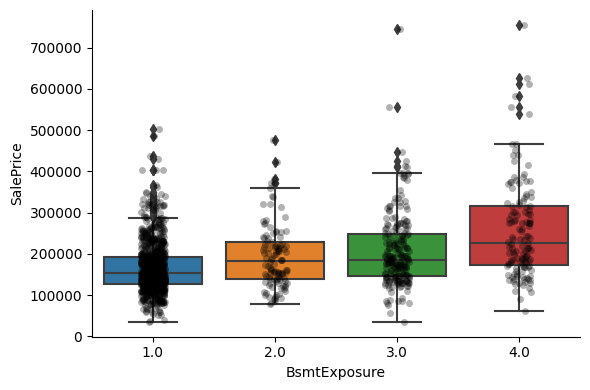

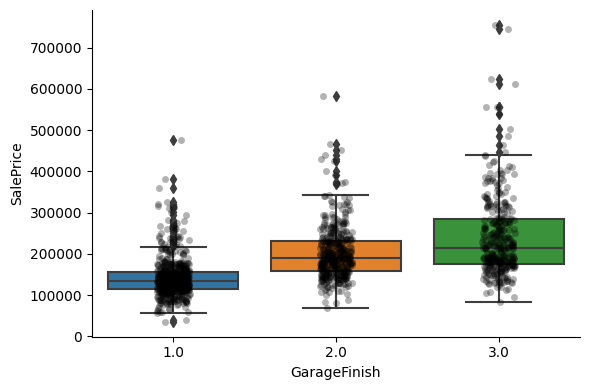

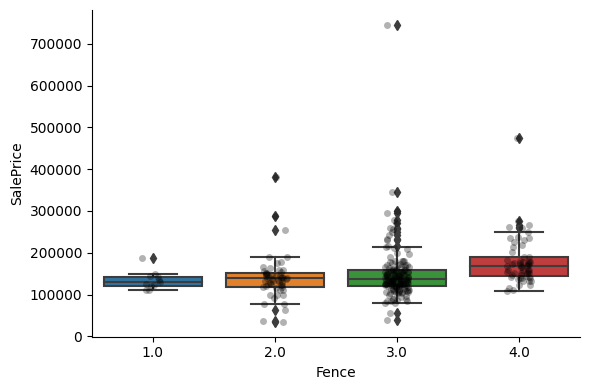

In [94]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most attributes, the increase in the house price with the value of the variable, is quite clear.

In [96]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_var if var not in qual_vars
]

len(cat_others)

31

### Rare labels:
Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [98]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(df, var, 0.01))
    print()

MSSubClass
40     0.002740
45     0.008219
180    0.006849
Name: SalePrice, dtype: float64

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.

Some of the categorical variables show multiple labels that are present in less than 1% of the houses.

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

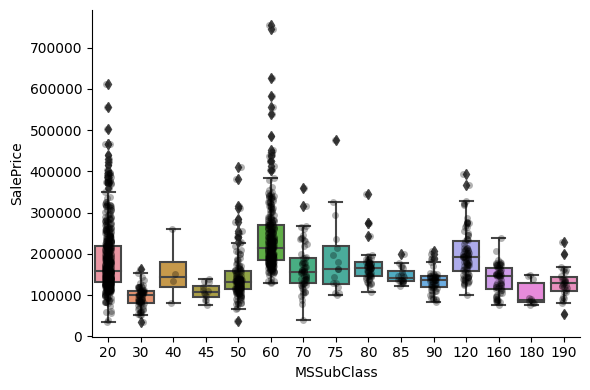

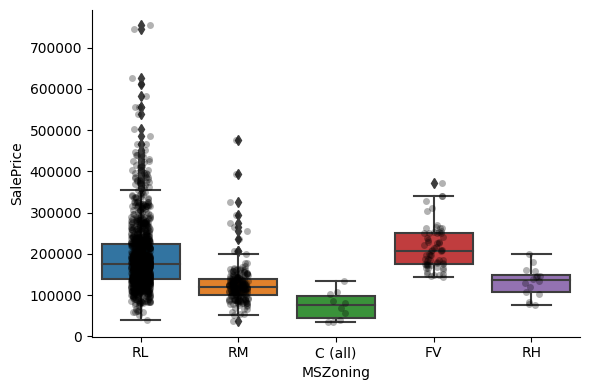

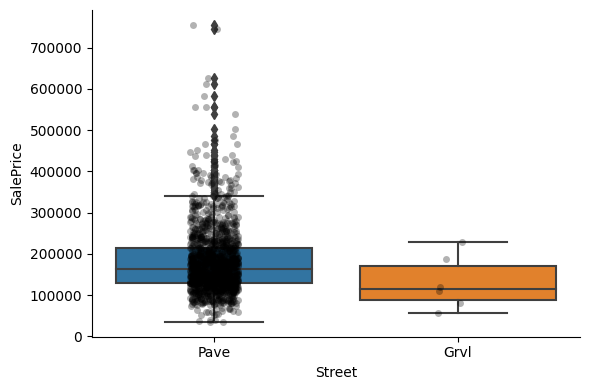

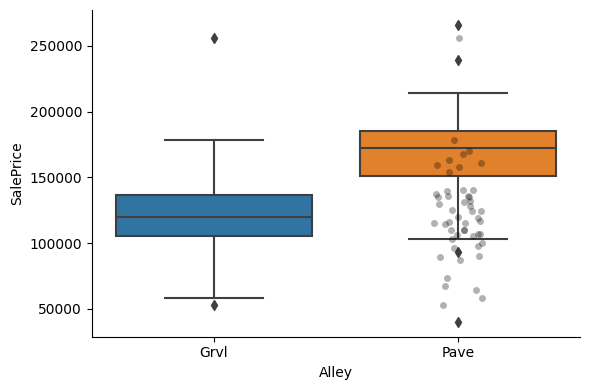

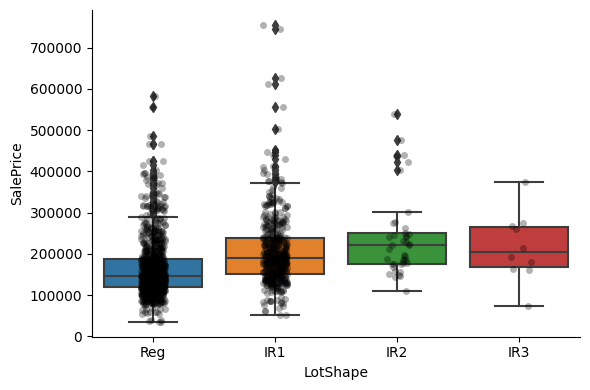

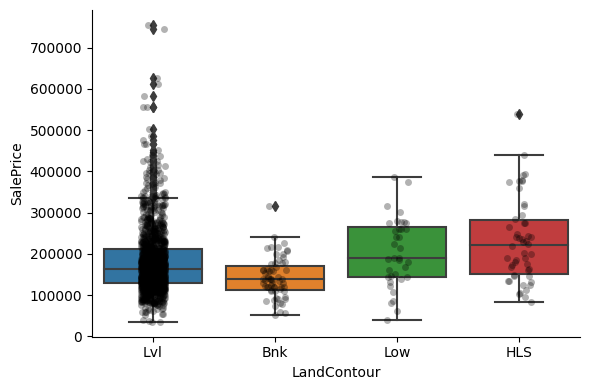

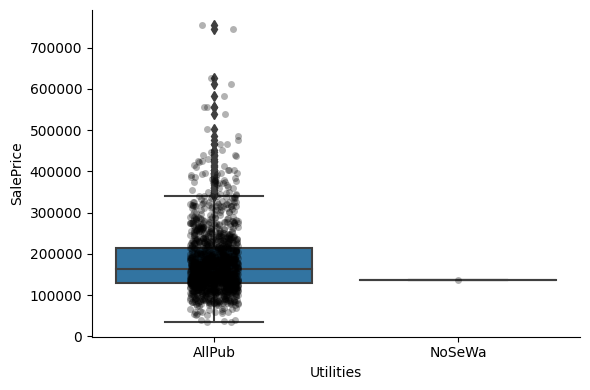

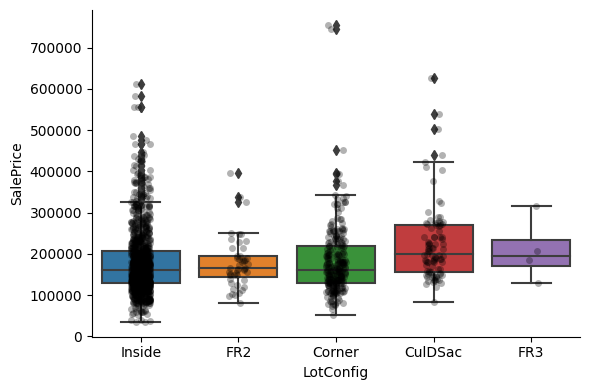

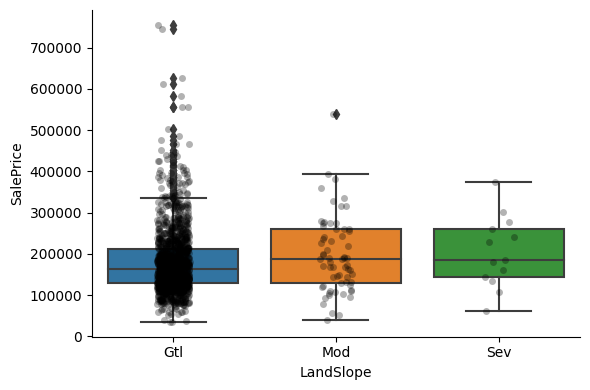

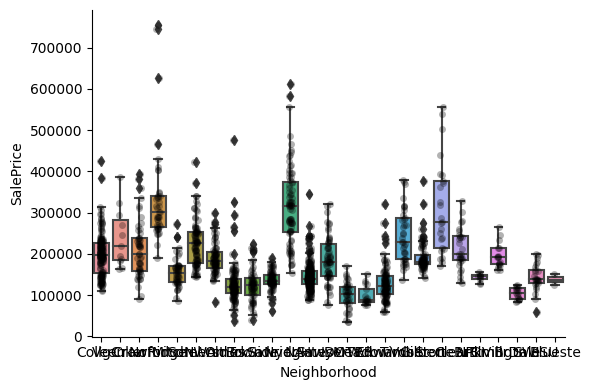

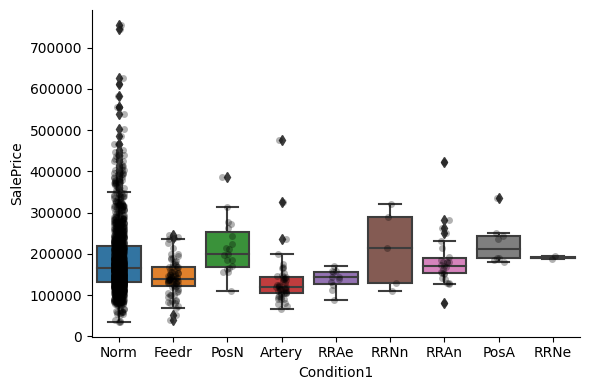

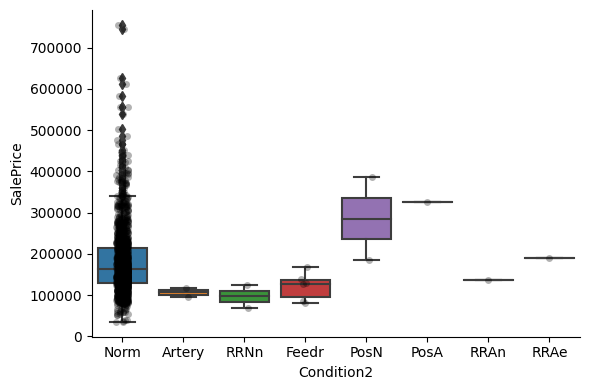

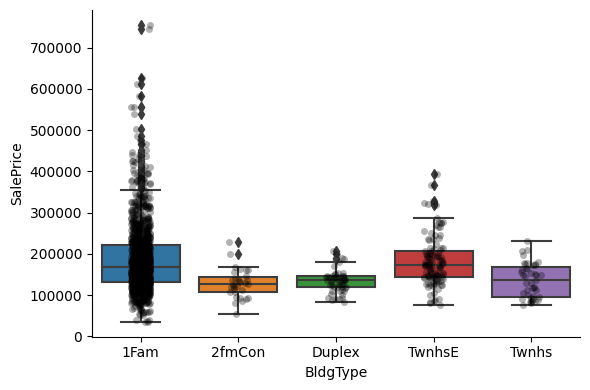

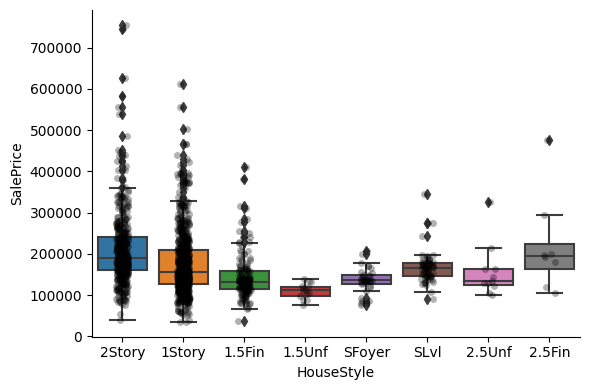

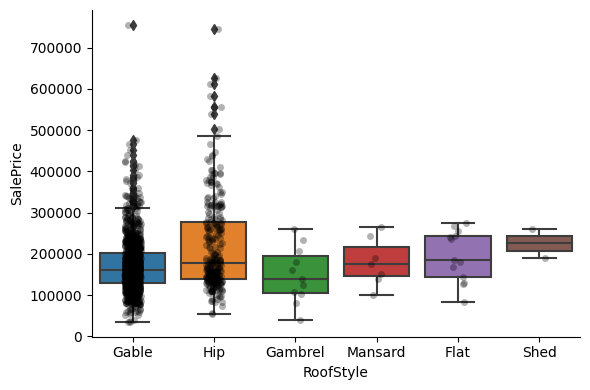

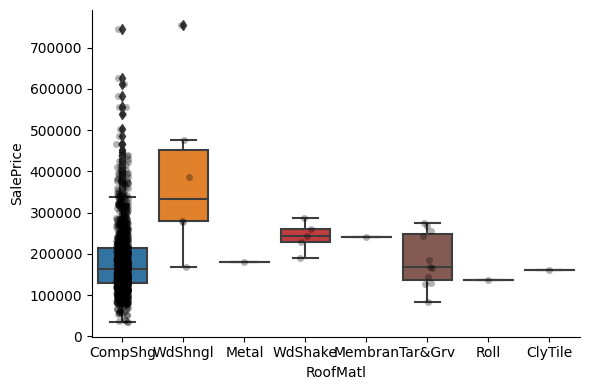

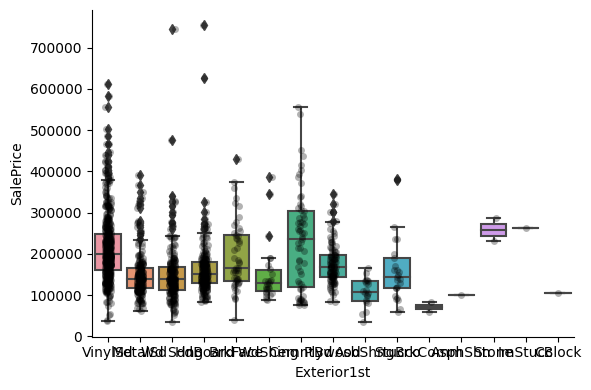

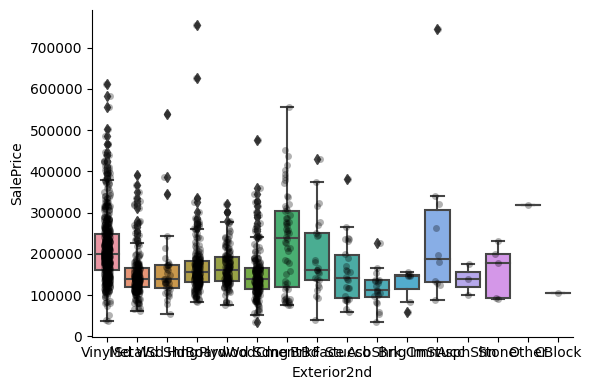

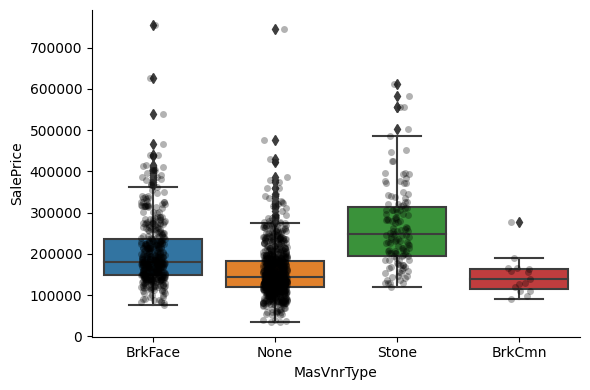

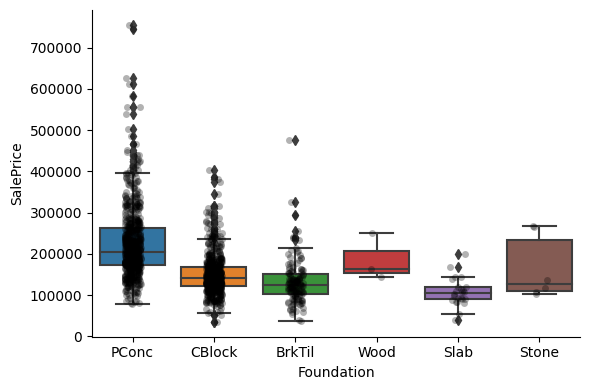

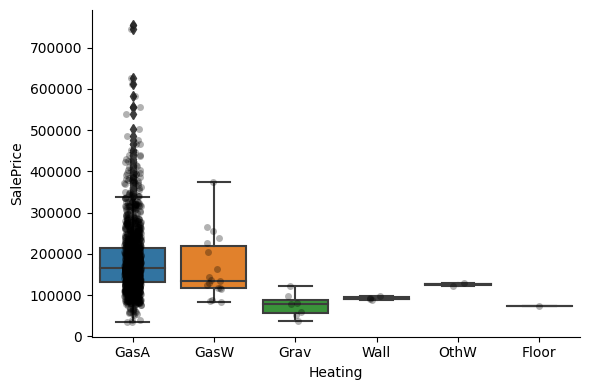

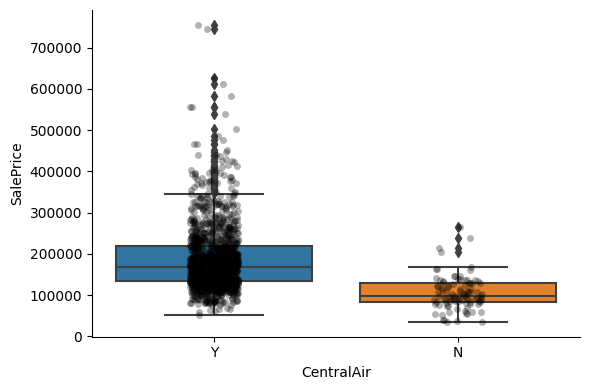

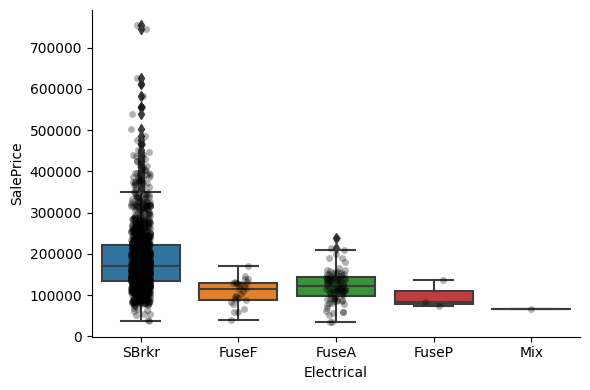

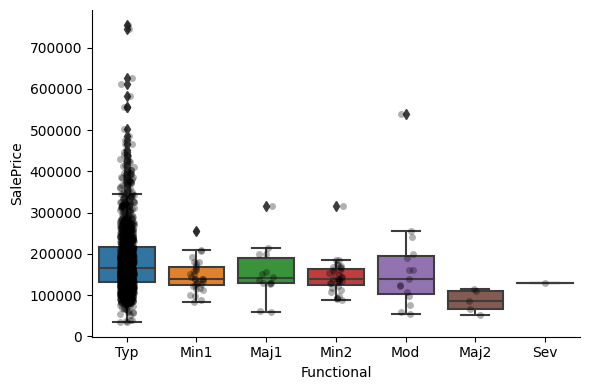

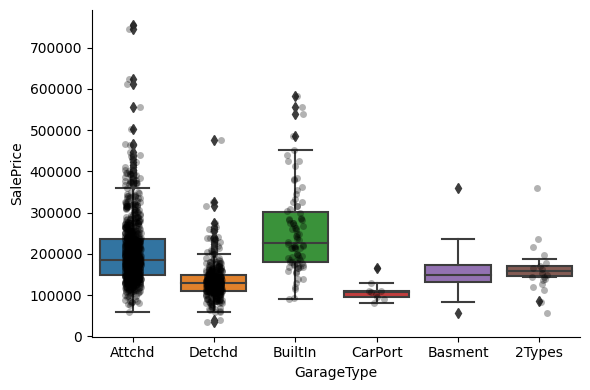

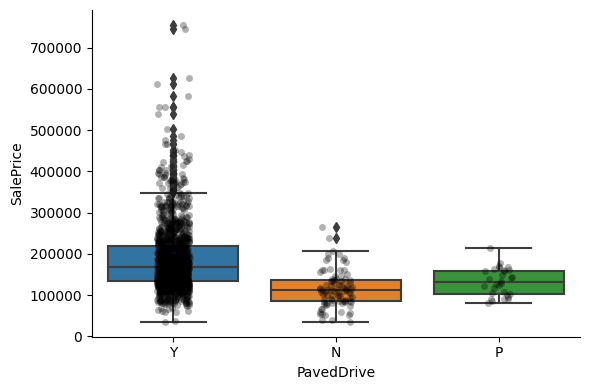

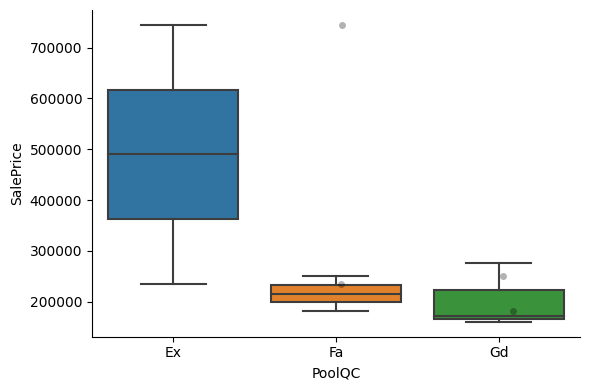

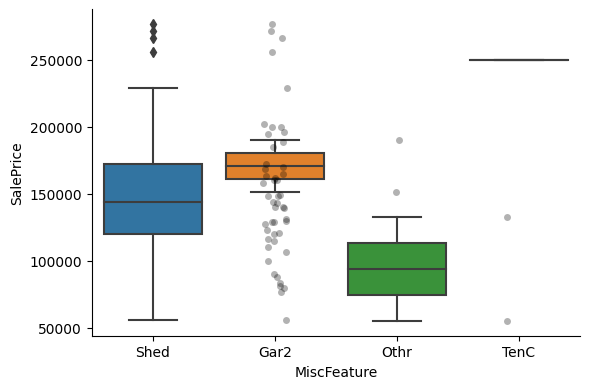

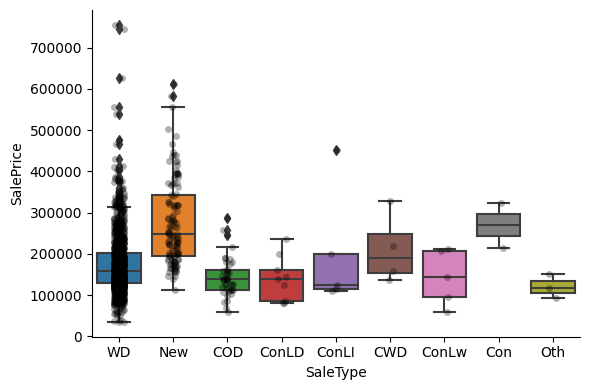

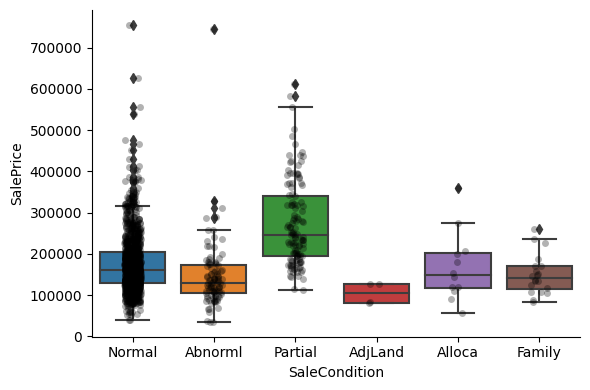

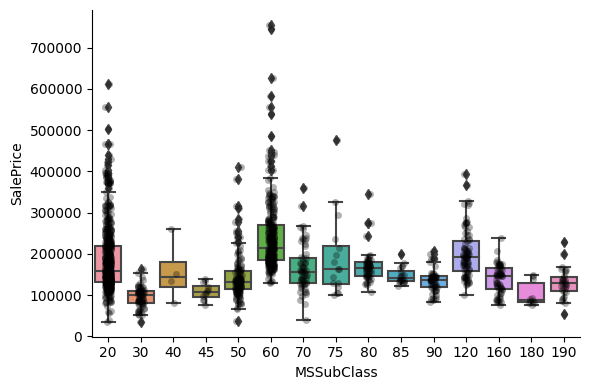

In [99]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.

Source: https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99

### Heroku
Heroku is a platform as a service (PaaS) that enables the deployment of web apps based on a managed container system, with integrated data services and a powerful ecosystem. In simple words, this will allow you to take the application from your local machine to the cloud so that anybody can access it using a Web URL. In this tutorial we have chosen Heroku for deployment as it provides free resource hours when you sign up for new account.